# <b>PRCP-1025
# <b>FLIGHT PRICE PREDICTION

## <b>DOMAIN OVERVIEW
#### <b>PROBLEM : </b> Flight ticket prices are highly unpredictable, often changing day to day, today we might see a price, check out the price of the same flight tomorrow, it will be a different story, making it challenging for travelers and airlines to forecast costs

## <b>BUSINESS PROBLEM

## <b>PROBLEM CONTEXT
<b>

- The goal of this project is to build a predictive regression model that can be useful to forecast the flight fare based on various factors 
- Flight ticket prices are highly unpredictable, often changing day to day, today we might see a price, check out the price of the same flight tomorrow, it will be a different story, making it challenging for travelers and airlines to forecast costs.

# <b>TASK 1
### <b>PREPARE A COMPLETE DATA ANALYSIS REPORT ON THE GIVEN DATA.

# <b>TASK 2
### <b>CREATE A PREDICTIVE MODEL WHICH WILL HELP THE CUSTOMERS TO PREDICT FUTURE FLIGHT PRICES AND PLAN THEIR JOURNEY ACCORDINGLY.

## <b>FEATURES:
<b>
    
- Airline
- Date_of_Journey
- Source
- Destination
- Route
- Arrival_Time
- Duration
- Total_Stops
- Additional_Info
- Price

### <b>TYPE OF MACHINE LEARNING PROBLEM.
- <b>It is a Regression problem, where given the above set of features, we need to estimate pric.<br>
### <b>LIST OF ALGORITHMS USES FOR Regression
<b>
    
- Linear Regression
- Support Vector Regressor
- DecisionTreeRegressor
- RandomForestRegressor
- GradientBoostingRegressor
- XGBRegressor

## <b>DATASET OVERVIEW

#### <b>Feature	Description

- <b>Airline</b><br>
This column will have all the types of airlines like Indigo, Jet Airways, Air India,  and many more.

- <b>Date_of_Journey</b><br>
This column will let us know about the date on which the passenger's journey will start.

- <b>Source</b><br>
This column holds the name of the place form where the passenger's journey will start.

- <b>Destination</b><br>
This column holds the name of the place to where passengers wanted to travel.

- <b>Route</b><br>
Here we can know about what the route is through which passengers have opted to travel form his/her source to their destination.

- <b>Arrival_Time</b><br>
Arrival time is when the passenger will reach his/her destination.

- <b>Duration</b><br>
Duration is the whole period that a flight will take to complete its journey form source to destination.

- <b>Total_Stops</b><br>
This will let us know in how many places flights will stop there for the flight in the whole journey.

- <b>Additional_Info</b><br>
In this column, we will get information about food, kind of food, and other amenities.

- <b>Price</b><br>
Price of the flight for a complete journey including all the expenses before onboarding.

# <b>TASK 1
### <b>PREPARE A COMPLETE DATA ANALYSIS REPORT ON THE GIVEN DATA.

##  <b>IMPORTING LIBRARIES AND LOAD DATA

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Loading Dataset:
df = pd.read_excel('Flight_Fare.xlsx')

In [4]:
# For displaying all feature from dataset:
pd.pandas.set_option('display.max_columns', None)

## <b>BASIC CHECKS

In [5]:
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [6]:
# Top 5 Records
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [7]:
# Bottom 5 Records
df.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648
10682,Air India,9/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,10:55,19:15,8h 20m,2 stops,No info,11753


In [8]:
# Check shape of dataset
df.shape

(10683, 11)

<b>Observation
- In data their are 18278 observation and 104 feature.

In [9]:
# Check column list
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

<b>Observation
- In this data 104 column available with unique column

In [10]:
# If view all feature
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


<b>Observation
- In this data two types of data available [ int=45, object=43 ]

## <b>STASTICAL MEASURE OF DATA

In [11]:
#Display Statistics info about numerical data
df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [12]:
#Display Statistics info about categorical data
df.describe(include = "O") 

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
count,10683,10683,10683,10683,10682,10683,10683,10683,10682,10683
unique,12,44,5,6,128,222,1343,368,5,10
top,Jet Airways,18/05/2019,Delhi,Cochin,DEL → BOM → COK,18:55,19:00,2h 50m,1 stop,No info
freq,3849,504,4537,4537,2376,233,423,550,5625,8345


<b>Observations from Statistical description
- There are 12 unqiue airline ,the most frequent arline is jet airways -> appearing 3849 times.
- Date of journey has 44 unique values, the most frequent date is 18/05/2019 -> appearing 504 times.
- There are 5 unique source and 6 unique destinations, the most frequent route is from Delhi to cochin -> appearing 4537 times.
- There are 128 unique routes, the most frequent/common route is DEl->BOM->COK ->apperaing 2376 times.
- There are 222 unique departure times, with the most common being 18:55 -> appearing 233 times.
- There are 1343 unique arrival times, with 19:00 being the most frequent-> appearing 423 times.
- 368 unique durations, with 2h 50m being the most frequent-> appearing 550 times.
- There are 5 unique values for total stops, the most common is 1 stop -> appearing 5625 times.
- There are 10 unique values for additional_info , with no info being the most common -> appearing 8345 times.
- The mean value for Price is Rs.9087.06 , min price Rs.1759 , max price Rs.79512 , median(50th percenticle) Rs.8372 : price is right skewed
- STD is 4611.36 this implies that there is a high significant difference, because std is approximately 50% of the mean value, so the filght fare can vary highly

In [13]:
df.count()

Airline            10683
Date_of_Journey    10683
Source             10683
Destination        10683
Route              10682
Dep_Time           10683
Arrival_Time       10683
Duration           10683
Total_Stops        10682
Additional_Info    10683
Price              10683
dtype: int64

In [14]:
# Finding the number of null values in the column
print("\nNull values per column:")
df.isnull().sum()


Null values per column:


Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [15]:
# Printing the total number of null values
Gt = df.isnull().sum().sum()
print('\nTotal number of null values:',Gt)


Total number of null values: 2


In [16]:
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

#### <b>UNIQUE VALUES FROM ALL COLUMNS

In [17]:
# Printing the unique of values
df.Airline.unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [18]:
# Printing the total number of value count
df.Airline.value_counts()

Airline
Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: count, dtype: int64

In [19]:
# Printing the unique of values
df.Date_of_Journey.unique()

array(['24/03/2019', '1/05/2019', '9/06/2019', '12/05/2019', '01/03/2019',
       '24/06/2019', '12/03/2019', '27/05/2019', '1/06/2019',
       '18/04/2019', '9/05/2019', '24/04/2019', '3/03/2019', '15/04/2019',
       '12/06/2019', '6/03/2019', '21/03/2019', '3/04/2019', '6/05/2019',
       '15/05/2019', '18/06/2019', '15/06/2019', '6/04/2019',
       '18/05/2019', '27/06/2019', '21/05/2019', '06/03/2019',
       '3/06/2019', '15/03/2019', '3/05/2019', '9/03/2019', '6/06/2019',
       '24/05/2019', '09/03/2019', '1/04/2019', '21/04/2019',
       '21/06/2019', '27/03/2019', '18/03/2019', '12/04/2019',
       '9/04/2019', '1/03/2019', '03/03/2019', '27/04/2019'], dtype=object)

In [20]:
# Printing the total number of value count
df.Date_of_Journey.value_counts()

Date_of_Journey
18/05/2019    504
6/06/2019     503
21/05/2019    497
9/06/2019     495
12/06/2019    493
9/05/2019     484
21/03/2019    423
15/05/2019    405
27/05/2019    382
27/06/2019    355
24/06/2019    351
1/06/2019     342
3/06/2019     333
15/06/2019    328
24/03/2019    323
6/03/2019     308
27/03/2019    299
24/05/2019    286
6/05/2019     282
1/05/2019     277
12/05/2019    259
1/04/2019     257
3/03/2019     218
9/03/2019     200
15/03/2019    162
18/03/2019    156
01/03/2019    152
12/03/2019    142
9/04/2019     125
3/04/2019     110
21/06/2019    109
18/06/2019    105
09/03/2019    102
6/04/2019     100
03/03/2019     97
06/03/2019     95
27/04/2019     94
24/04/2019     92
3/05/2019      90
15/04/2019     89
21/04/2019     82
18/04/2019     67
12/04/2019     63
1/03/2019      47
Name: count, dtype: int64

In [21]:
# Printing the unique of values
df.Source.unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [22]:
# Printing the total number of value count
df.Source.value_counts()

Source
Delhi       4537
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: count, dtype: int64

In [23]:
# Printing the unique of values
df.Destination.unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [24]:
# Printing the total number of value count
df.Destination.value_counts()

Destination
Cochin       4537
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: count, dtype: int64

In [25]:
# Printing the unique of values
df.Route.unique()

array(['BLR → DEL', 'CCU → IXR → BBI → BLR', 'DEL → LKO → BOM → COK',
       'CCU → NAG → BLR', 'BLR → NAG → DEL', 'CCU → BLR',
       'BLR → BOM → DEL', 'DEL → BOM → COK', 'DEL → BLR → COK',
       'MAA → CCU', 'CCU → BOM → BLR', 'DEL → AMD → BOM → COK',
       'DEL → PNQ → COK', 'DEL → CCU → BOM → COK', 'BLR → COK → DEL',
       'DEL → IDR → BOM → COK', 'DEL → LKO → COK',
       'CCU → GAU → DEL → BLR', 'DEL → NAG → BOM → COK',
       'CCU → MAA → BLR', 'DEL → HYD → COK', 'CCU → HYD → BLR',
       'DEL → COK', 'CCU → DEL → BLR', 'BLR → BOM → AMD → DEL',
       'BOM → DEL → HYD', 'DEL → MAA → COK', 'BOM → HYD',
       'DEL → BHO → BOM → COK', 'DEL → JAI → BOM → COK',
       'DEL → ATQ → BOM → COK', 'DEL → JDH → BOM → COK',
       'CCU → BBI → BOM → BLR', 'BLR → MAA → DEL',
       'DEL → GOI → BOM → COK', 'DEL → BDQ → BOM → COK',
       'CCU → JAI → BOM → BLR', 'CCU → BBI → BLR', 'BLR → HYD → DEL',
       'DEL → TRV → COK', 'CCU → IXR → DEL → BLR',
       'DEL → IXU → BOM → COK', 'CCU 

In [26]:
# Printing the total number of value count
df.Route.value_counts()

Route
DEL → BOM → COK          2376
BLR → DEL                1552
CCU → BOM → BLR           979
CCU → BLR                 724
BOM → HYD                 621
                         ... 
CCU → VTZ → BLR             1
CCU → IXZ → MAA → BLR       1
BOM → COK → MAA → HYD       1
BOM → CCU → HYD             1
BOM → BBI → HYD             1
Name: count, Length: 128, dtype: int64

In [27]:
# Printing the unique of values
df.Dep_Time.unique()

array(['22:20', '05:50', '09:25', '18:05', '16:50', '09:00', '18:55',
       '08:00', '08:55', '11:25', '09:45', '20:20', '11:40', '21:10',
       '17:15', '16:40', '08:45', '14:00', '20:15', '16:00', '14:10',
       '22:00', '04:00', '21:25', '21:50', '07:00', '07:05', '09:50',
       '14:35', '10:35', '15:05', '14:15', '06:45', '20:55', '11:10',
       '05:45', '19:00', '23:05', '11:00', '09:35', '21:15', '23:55',
       '19:45', '08:50', '15:40', '06:05', '15:00', '13:55', '05:55',
       '13:20', '05:05', '06:25', '17:30', '08:20', '19:55', '06:30',
       '14:05', '02:00', '09:40', '08:25', '20:25', '13:15', '02:15',
       '16:55', '20:45', '05:15', '19:50', '20:00', '06:10', '19:30',
       '04:45', '12:55', '18:15', '17:20', '15:25', '23:00', '12:00',
       '14:45', '11:50', '11:30', '14:40', '19:10', '06:00', '23:30',
       '07:35', '13:05', '12:30', '15:10', '12:50', '18:25', '16:30',
       '00:40', '06:50', '13:00', '19:15', '01:30', '17:00', '10:00',
       '19:35', '15:

In [28]:
# Printing the total number of value count
df.Dep_Time.value_counts()

Dep_Time
18:55    233
17:00    227
07:05    205
10:00    203
07:10    202
        ... 
16:25      1
01:35      1
21:35      1
04:15      1
03:00      1
Name: count, Length: 222, dtype: int64

In [29]:
# Printing the unique of values
df.Arrival_Time.unique()

array(['01:10 22 Mar', '13:15', '04:25 10 Jun', ..., '06:50 10 Mar',
       '00:05 19 Mar', '21:20 13 Mar'], dtype=object)

In [30]:
# Printing the total number of value count
df.Arrival_Time.value_counts()

Arrival_Time
19:00           423
21:00           360
19:15           333
16:10           154
12:35           122
               ... 
00:25 02 Jun      1
08:55 13 Mar      1
11:05 19 May      1
12:30 22 May      1
21:20 13 Mar      1
Name: count, Length: 1343, dtype: int64

In [31]:
# Printing the unique of values
df.Duration.unique()

array(['2h 50m', '7h 25m', '19h', '5h 25m', '4h 45m', '2h 25m', '15h 30m',
       '21h 5m', '25h 30m', '7h 50m', '13h 15m', '2h 35m', '2h 15m',
       '12h 10m', '26h 35m', '4h 30m', '22h 35m', '23h', '20h 35m',
       '5h 10m', '15h 20m', '2h 55m', '13h 20m', '15h 10m', '5h 45m',
       '5h 55m', '13h 25m', '22h', '5h 30m', '10h 25m', '5h 15m',
       '2h 30m', '6h 15m', '11h 55m', '11h 5m', '8h 30m', '22h 5m',
       '2h 45m', '12h', '16h 5m', '19h 55m', '3h 15m', '25h 20m', '3h',
       '16h 15m', '15h 5m', '6h 30m', '25h 5m', '12h 25m', '27h 20m',
       '10h 15m', '10h 30m', '1h 30m', '1h 25m', '26h 30m', '7h 20m',
       '13h 30m', '5h', '19h 5m', '14h 50m', '2h 40m', '22h 10m',
       '9h 35m', '10h', '21h 20m', '18h 45m', '12h 20m', '18h', '9h 15m',
       '17h 30m', '16h 35m', '12h 15m', '7h 30m', '24h', '8h 55m',
       '7h 10m', '14h 30m', '30h 20m', '15h', '12h 45m', '10h 10m',
       '15h 25m', '14h 5m', '20h 15m', '23h 10m', '18h 10m', '16h',
       '2h 20m', '8h', '16h 5

In [32]:
# Printing the total number of value count
df.Duration.value_counts()

Duration
2h 50m     550
1h 30m     386
2h 45m     337
2h 55m     337
2h 35m     329
          ... 
31h 30m      1
30h 25m      1
42h 5m       1
4h 10m       1
47h 40m      1
Name: count, Length: 368, dtype: int64

In [33]:
# Printing the unique of values
df.Total_Stops.unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', nan, '4 stops'],
      dtype=object)

In [34]:
# Printing the total number of value count
df.Total_Stops.value_counts()

Total_Stops
1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: count, dtype: int64

In [35]:
# Printing the unique of values
df.Additional_Info.unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [36]:
# Printing the total number of value count
df.Additional_Info.value_counts()

Additional_Info
No info                         8345
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: count, dtype: int64

## <b>EXPLOTARY DATA ANALYSIS

### <b>UNIVARIATE ANALYSIS

In [37]:
# Analysing the distribution for price column
skewness = df['Price'].skew()
print(skewness)

1.8125523782189141


#### <b>1) HISTPLOT FOR ALL COLUMNS

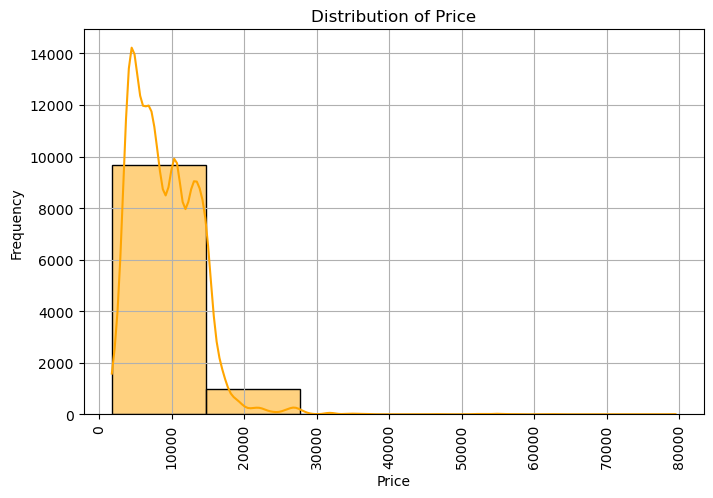

In [38]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Price'], kde=True, bins=6, color='orange', edgecolor='black')
plt.title('Distribution of Price')
plt.xlabel('Price')
plt.xticks(rotation=90)
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

<b>Observation
- Distribution of Price column -> positively right skewed.
- Most of the flight price ranges between 1700 to 15000. 

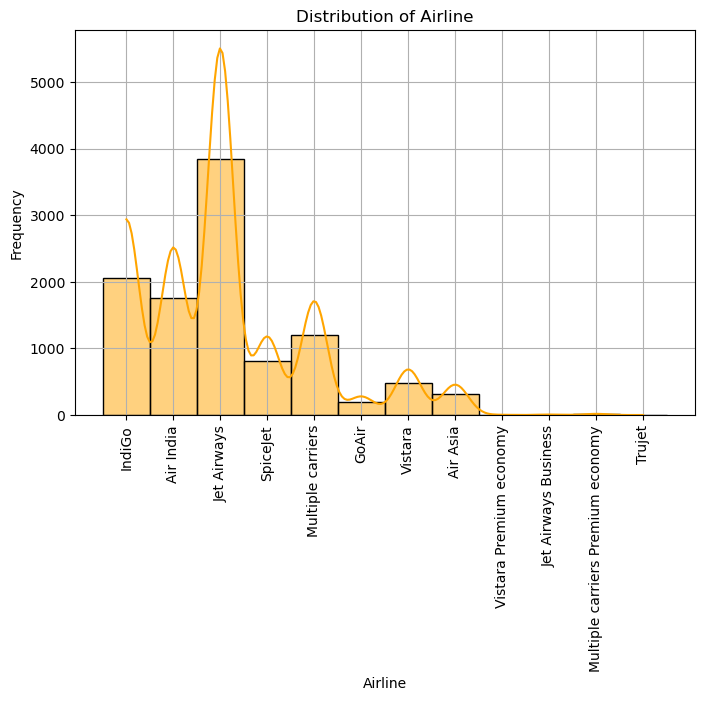

In [39]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Airline'], kde=True, bins=6, color='orange', edgecolor='black')
plt.title('Distribution of Airline')
plt.xlabel('Airline')
plt.xticks(rotation=90)
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

<b>Observation
- Airline: Right-skewed (Most bookings concentrated on a few airlines, with a long tail for less frequent airlines).

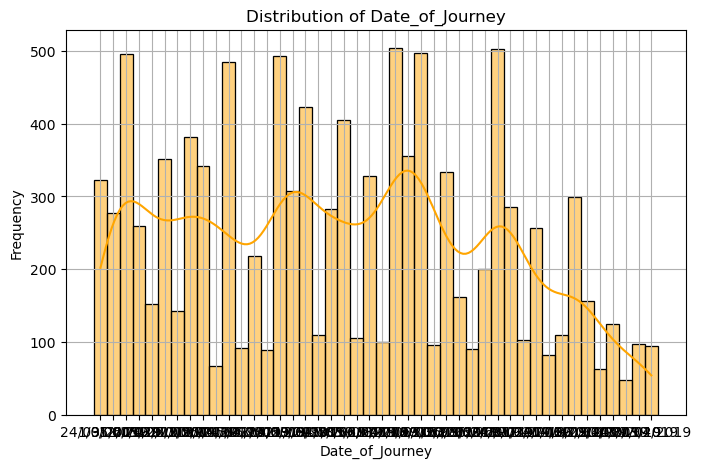

In [40]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Date_of_Journey'], kde=True, bins=6, color='orange', edgecolor='black')
plt.title('Distribution of Date_of_Journey')
plt.xlabel('Date_of_Journey')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

<b>Observation
- Date of Journey: Skewed (Not normally distributed; counts vary widely across different dates).

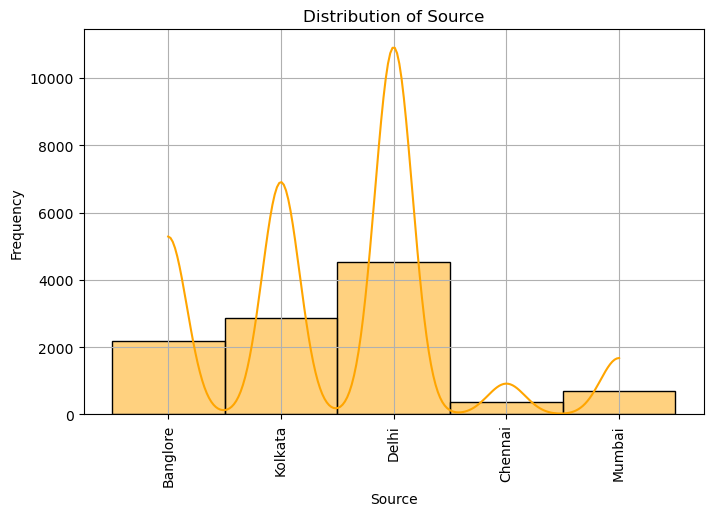

In [41]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Source'], kde=True, bins=6, color='orange', edgecolor='black')
plt.title('Distribution of Source')
plt.xlabel('Source')
plt.xticks(rotation=90)
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

<b>Observation
- Source: Right-skewed (Few cities like Delhi dominate, with other cities having lower counts).

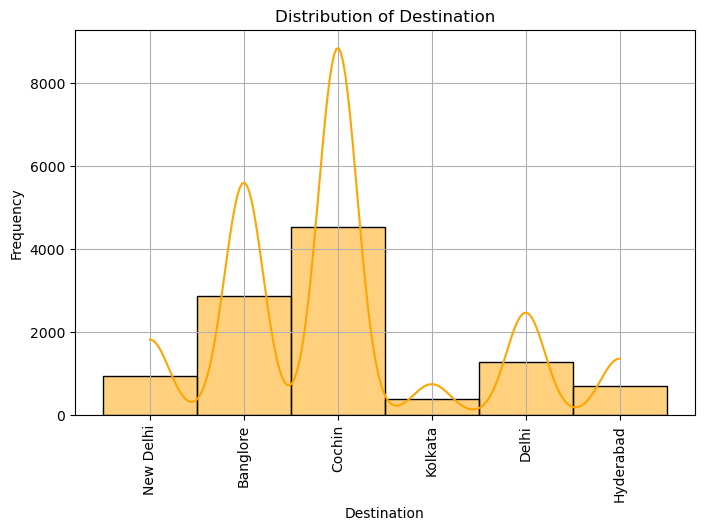

In [42]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Destination'], kde=True, bins=6, color='orange', edgecolor='black')
plt.title('Distribution of Destination')
plt.xlabel('Destination')
plt.xticks(rotation=90)
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

<b>Observation
- Destination: Right-skewed (Similar to Source; destinations like Delhi and Cochin are more common).

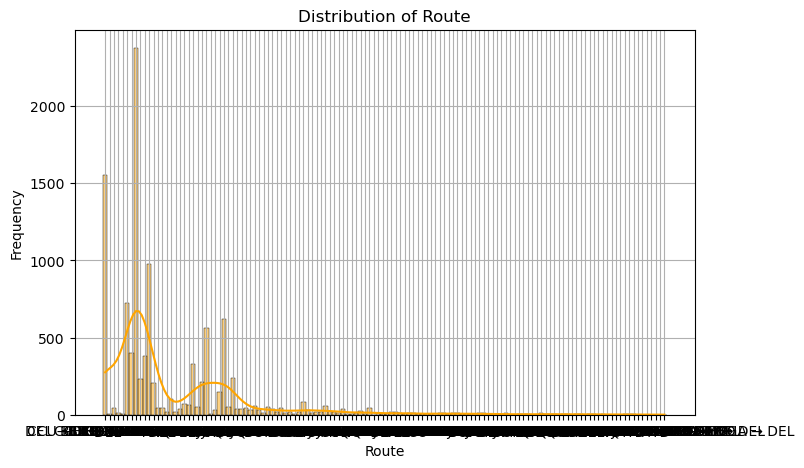

In [43]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Route'], kde=True, bins=6, color='orange', edgecolor='black')
plt.title('Distribution of Route')
#plt.xlabel('Route')
#plt.xticks(rotation=90)
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

<b>Observation
- Route: Right-skewed (A few routes are very frequent, with a long tail for less common routes).

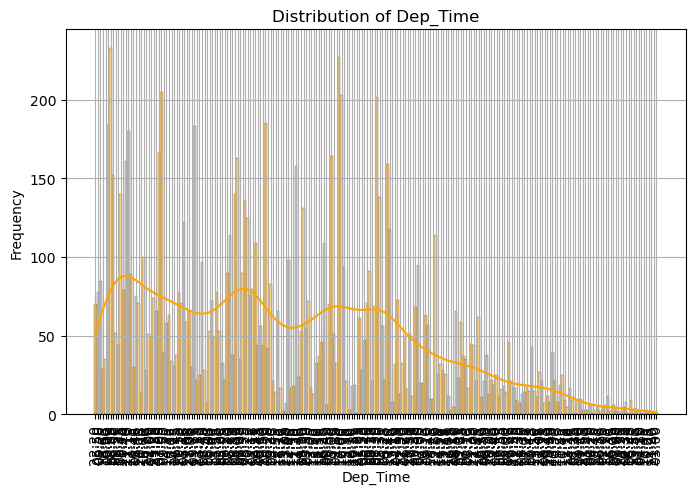

In [44]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Dep_Time'], kde=True, bins=6, color='orange', edgecolor='black')
plt.title('Distribution of Dep_Time')
plt.xlabel('Dep_Time')
plt.xticks(rotation=90)
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

<b>Observation
- Dep. Time: Right-skewed (More frequent departures at specific times like early mornings or evenings).

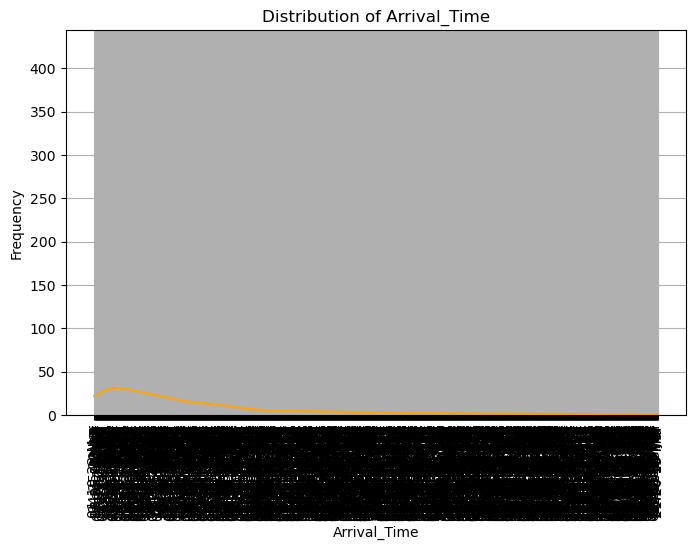

In [45]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Arrival_Time'], kde=True, bins=6, color='orange', edgecolor='black')
plt.title('Distribution of Arrival_Time')
plt.xlabel('Arrival_Time')
plt.xticks(rotation=90)
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

<b>Observation
- Arrival_time:Right-skewed

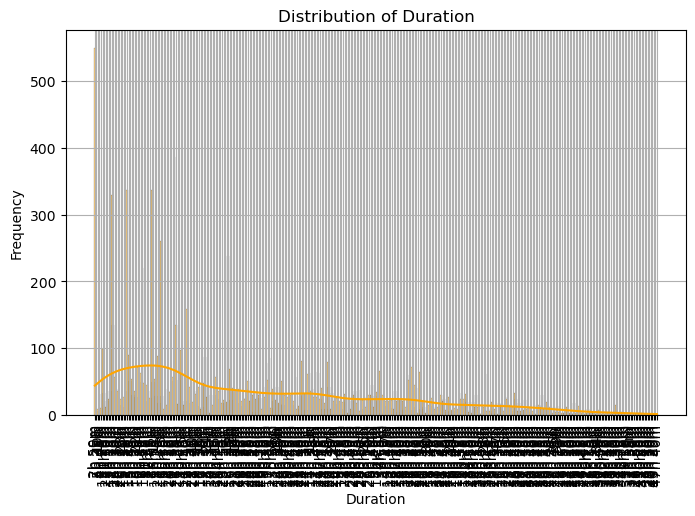

In [46]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Duration'], kde=True, bins=6, color='orange', edgecolor='black')
plt.title('Distribution of Duration')
plt.xlabel('Duration')
plt.xticks(rotation=90)
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

<b>Observation
- Duration:Right-skewed

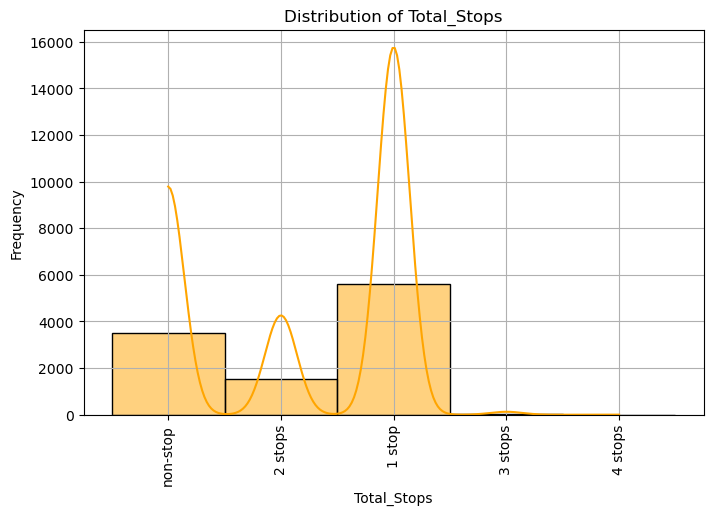

In [47]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Total_Stops'], kde=True, bins=6, color='orange', edgecolor='black')
plt.title('Distribution of Total_Stops')
plt.xlabel('Total_Stops')
plt.xticks(rotation=90)
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

<b>Observation
- Total_stops:Right-skewed

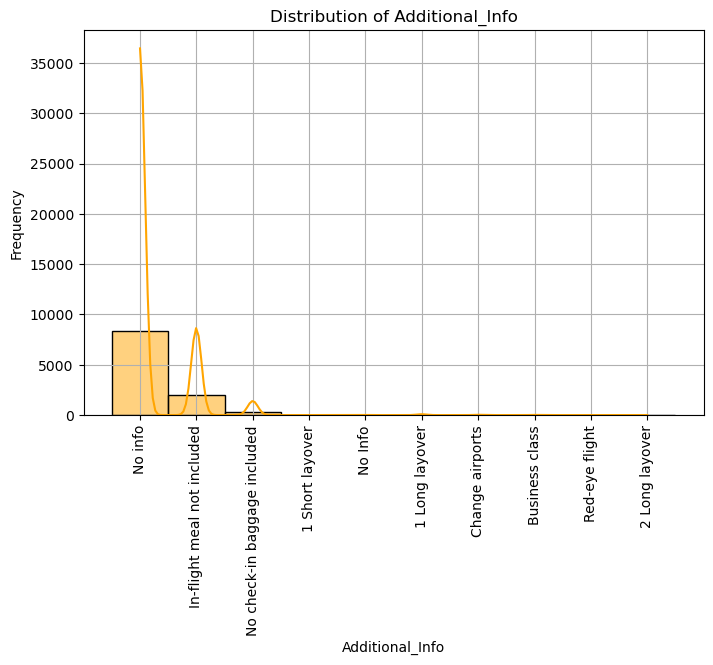

In [48]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Additional_Info'], kde=True, bins=6, color='orange', edgecolor='black')
plt.title('Distribution of Additional_Info')
plt.xlabel('Additional_Info')
plt.xticks(rotation=90)
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

<b>Observation
- Additional_Info:Right-skewed

#### <b>2) COUNTPLOT FOR ALL COLUMNS

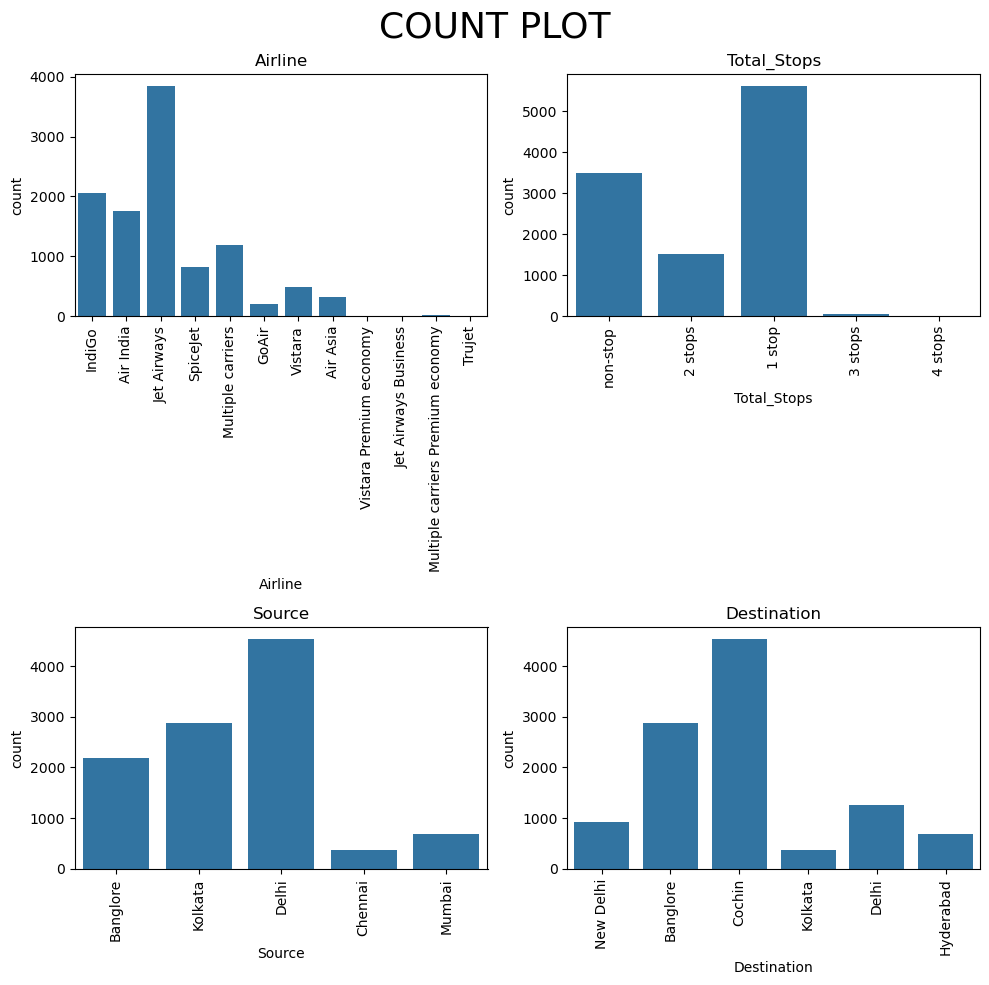

In [49]:
col = df[['Airline', 'Total_Stops', 'Source', 'Destination']]
plt.figure(figsize=(10,10))
plt.suptitle('COUNT PLOT', fontsize=26)
plt_num = 1

for i in col.columns:  
    if plt_num <= 4:
        br = plt.subplot(2, 2, plt_num)
        sns.countplot(x=df[i])  
        plt.title(i)
        plt.xticks(rotation=90)
    plt_num += 1

plt.tight_layout()
plt.show()

<b>Observation
- Airline:
    - Jet Airways is the most frequently used airline.
    - Vistara Premium economy, Jet Airways business,Trujet,Muliple carriers Premium economy airlines are not used that much.
    - IndiGo, Air India, and SpiceJet airlines are used moderately.

- Total_stops:
    - Most of the flight has only one stop.
    - Most travelers prefer flights with 1 stop.

- Source:
    - Most of the flight's source place is Delhi.
    - Delhi is the primary hub for departures, followed by Kolkata, highlighting these cities as key travel hubs.

- Destination:
    - Most of the flight's destination is cochin.
    - Kolkata and Delhi are moderately served destinations.

#### <b>3) BOXPLOT FOR ALL COLUMNS

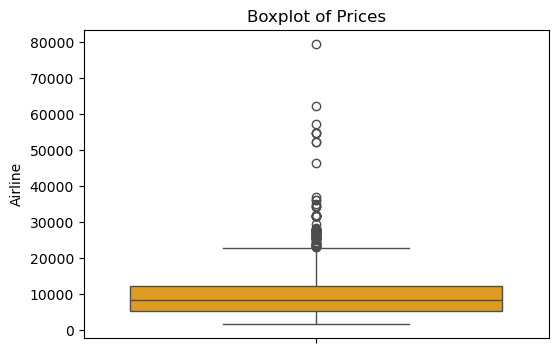

In [50]:
plt.figure(figsize=(6, 4))  # optional: adjust figure size
sns.boxplot(y='Price', data=df, color='orange')
plt.title('Boxplot of Prices')
plt.ylabel('Airline')
plt.show()

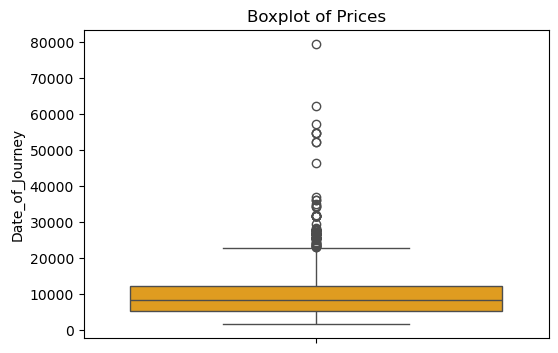

In [51]:
plt.figure(figsize=(6, 4))  # optional: adjust figure size
sns.boxplot(y='Price', data=df, color='orange')
plt.title('Boxplot of Prices')
plt.ylabel('Date_of_Journey')
plt.show()

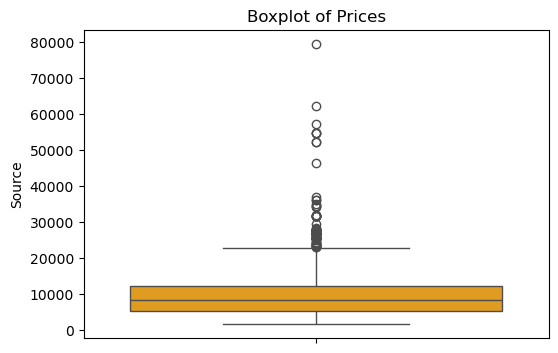

In [52]:
plt.figure(figsize=(6, 4))  # optional: adjust figure size
sns.boxplot(y='Price', data=df, color='orange')
plt.title('Boxplot of Prices')
plt.ylabel('Source')
plt.show()

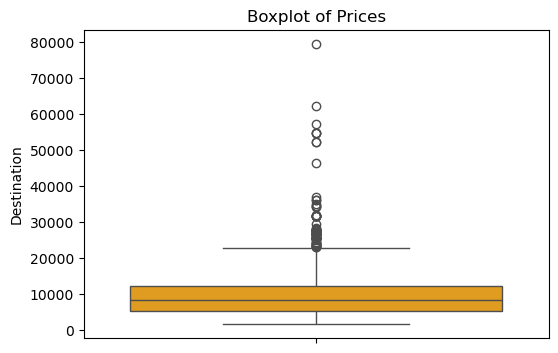

In [53]:
plt.figure(figsize=(6, 4))  # optional: adjust figure size
sns.boxplot(y='Price', data=df, color='orange')
plt.title('Boxplot of Prices')
plt.ylabel('Destination')
plt.show()

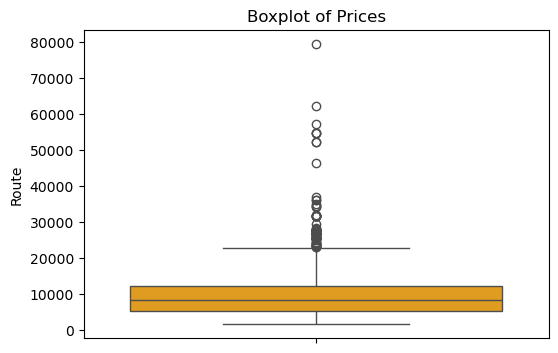

In [54]:
plt.figure(figsize=(6, 4))  # optional: adjust figure size
sns.boxplot(y='Price', data=df, color='orange')
plt.title('Boxplot of Prices')
plt.ylabel('Route')
plt.show()

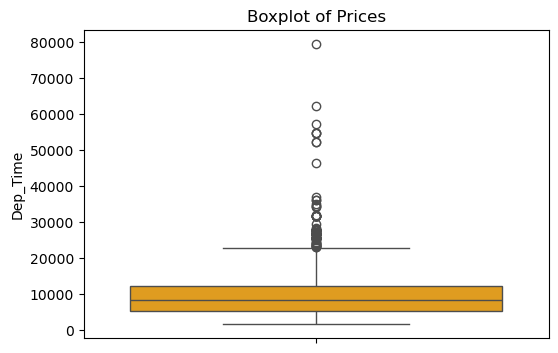

In [55]:
plt.figure(figsize=(6, 4))  # optional: adjust figure size
sns.boxplot(y='Price', data=df, color='orange')
plt.title('Boxplot of Prices')
plt.ylabel('Dep_Time')
plt.show()

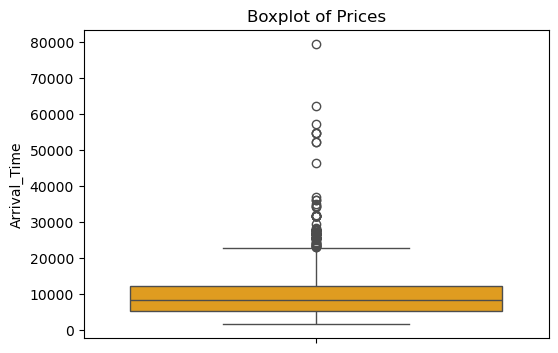

In [56]:
plt.figure(figsize=(6, 4))  # optional: adjust figure size
sns.boxplot(y='Price', data=df, color='orange')
plt.title('Boxplot of Prices')
plt.ylabel('Arrival_Time')
plt.show()

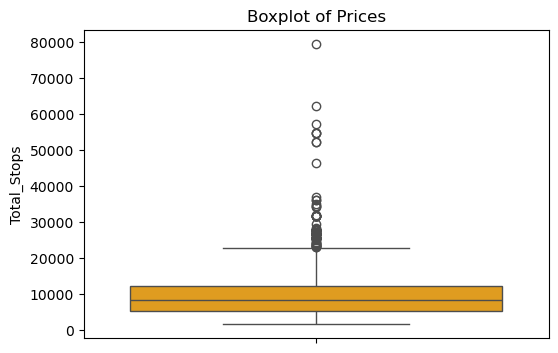

In [57]:
plt.figure(figsize=(6, 4))  # optional: adjust figure size
sns.boxplot(y='Price', data=df, color='orange')
plt.title('Boxplot of Prices')
plt.ylabel('Total_Stops')
plt.show()

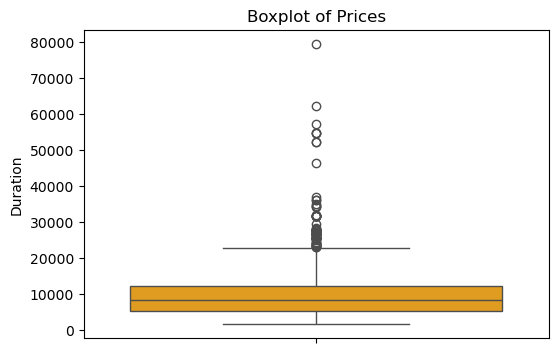

In [58]:
plt.figure(figsize=(6, 4))  # optional: adjust figure size
sns.boxplot(y='Price', data=df, color='orange')
plt.title('Boxplot of Prices')
plt.ylabel('Duration')
plt.show()

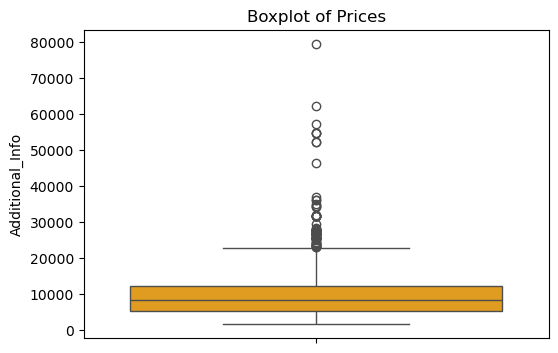

In [59]:
plt.figure(figsize=(6, 4))  # optional: adjust figure size
sns.boxplot(y='Price', data=df, color='orange')
plt.title('Boxplot of Prices')
plt.ylabel('Additional_Info')
plt.show()

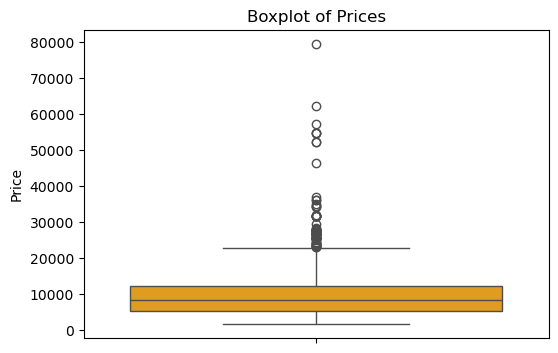

In [60]:
plt.figure(figsize=(6, 4))  # optional: adjust figure size
sns.boxplot(y='Price', data=df, color='orange')
plt.title('Boxplot of Prices')
plt.ylabel('Price')
plt.show()

<b>Observation
- Airline,Source,Destination,Route, Arrival_time,Duration,Price these columns have outliers.

### <b>BIVARIATE ANALYSIS

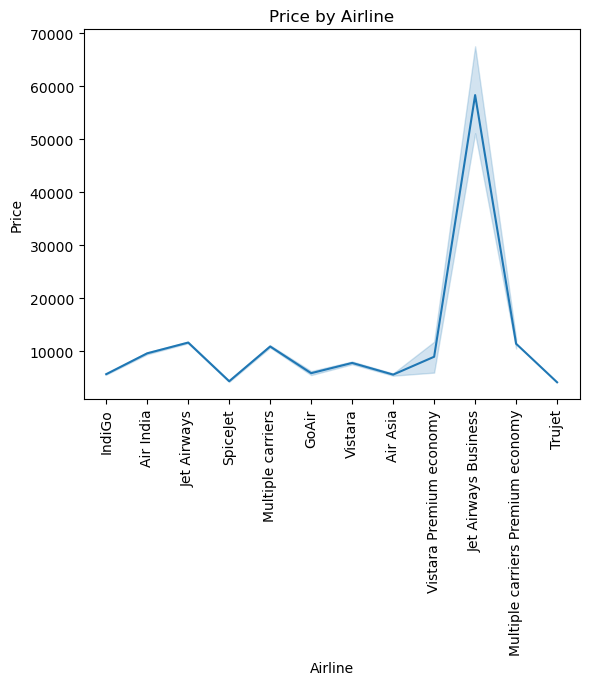

In [61]:
sns.lineplot(x='Airline',y='Price',data=df)
plt.title('Price by Airline')
plt.xlabel('Airline')
plt.xticks(rotation=90)
plt.ylabel('Price')
plt.show() 

<b>Observation
- Budget airlines like IndiGo, Air India, and SpiceJet have an average price range of 5000–10000.
- Vistara Premium Economy shows a sharp increase, with prices averaging around 30000.
- Jet Airways Business has the highest prices, peaking at approximately 58000–68000.
- TruJet offers the cheapest tickets, with prices dropping to 4000.

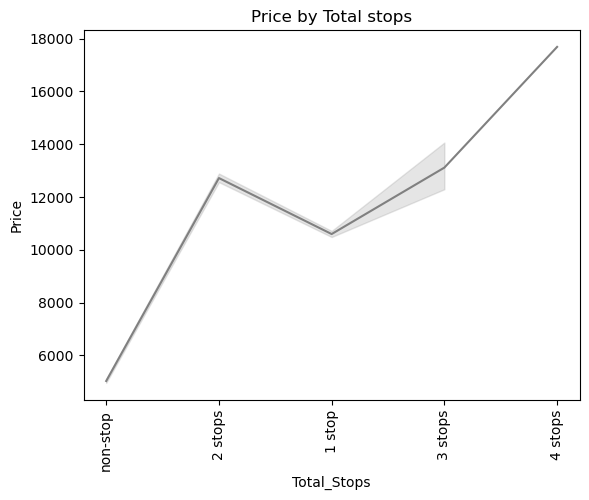

In [62]:
sns.lineplot(x='Total_Stops',y='Price',data=df, color = 'gray')
plt.title('Price by Total stops')
plt.xlabel('Total_Stops')
plt.xticks(rotation=90)
plt.ylabel('Price')
plt.show()

<b>Observation
- Flights with non-stop have the lowest prices.
- Prices increase significantly for flights with two stops.
- Flights with one stop have lower prices than two stops.
- Flights with four stops have the highest average price, reaching nearly ₹18,000.

### <b>MULTIVARIATE ANALYSIS

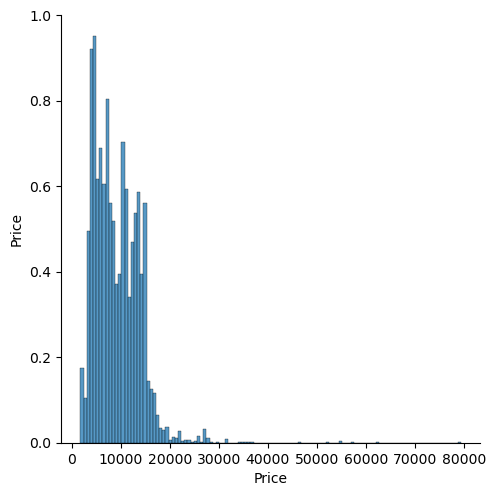

In [63]:
sns.pairplot(df, height=5)
plt.show()

## <b>DATA PREPROCESSING

### <b>1) CHECKING FOR DUPLICATES

In [64]:
df.duplicated().sum()

220

In [65]:
# All 220 duplicates values are droped
df.drop_duplicates(inplace=True)

### <b>2) CHECKING THE MISSING VALUES

In [66]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

#### <b>Handling Missing Values

- Replacing the missing value for Route and Total_staps column with mode because both the columns are categorical

In [67]:
# By fillna we filling the missing values in Route
df['Route'].fillna(df['Route'].mode()[0],inplace = True )

In [68]:
# By fillna we filling the missing values in Total_Stops 
df['Total_Stops'].fillna(df['Total_Stops'].mode()[0],inplace = True)

In [69]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

### <b>3) OUTLIERS

- Handling outliers for Price column

In [70]:
# Finding Q1 and Q3 
Q1 = df['Price'].quantile(0.25)
print('Lower Quartile',Q1)

Q3 = df['Price'].quantile(0.75)
print('Upper Quartile',Q3)

Lower Quartile 5224.0
Upper Quartile 12343.5


In [71]:
# Finding IQR
IQR = Q3 - Q1
IQR

7119.5

In [72]:
# Finding lower limit and upper limit 
lower_limit = Q1-1.5 * IQR
upper_limit = Q3+1.5 * IQR
print("Lower limit:", lower_limit)
print("upper limit:", upper_limit)

Lower limit: -5455.25
upper limit: 23022.75


In [73]:
df.loc[df['Price']>upper_limit]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
123,Air India,1/03/2019,Delhi,Cochin,DEL → BOM → COK,23:00,19:15 02 Mar,20h 15m,1 stop,No info,27430
396,Multiple carriers,1/03/2019,Delhi,Cochin,DEL → BOM → COK,12:50,19:15,6h 25m,1 stop,No info,36983
486,Jet Airways,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:55,15:15,6h 20m,1 stop,No info,26890
510,Jet Airways,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,07:00,12:25,5h 25m,1 stop,No info,26890
597,Air India,6/03/2019,Mumbai,Hyderabad,BOM → JDH → DEL → HYD,09:40,15:15 07 Mar,29h 35m,2 stops,No info,25139
...,...,...,...,...,...,...,...,...,...,...,...
10353,Jet Airways,6/03/2019,Mumbai,Hyderabad,BOM → BDQ → DEL → HYD,19:50,16:50 07 Mar,21h,2 stops,No info,24210
10364,Jet Airways Business,01/03/2019,Banglore,New Delhi,BLR → MAA → DEL,09:45,14:25,4h 40m,1 stop,Business class,57209
10383,Jet Airways,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,07:00,05:05 02 Mar,22h 5m,1 stop,No info,26890
10439,Jet Airways,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,18:40,09:00 02 Mar,14h 20m,1 stop,No info,31825


In [74]:
len(df.loc[df['Price']>upper_limit])/len(df)

0.008984038994552232

In [75]:
df.loc[df['Price']<lower_limit]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price


In [76]:
# Handling outliers by replacing data with Median as it is below 5%
df.loc[df['Price']>upper_limit, 'Price'] = df['Price'].median()

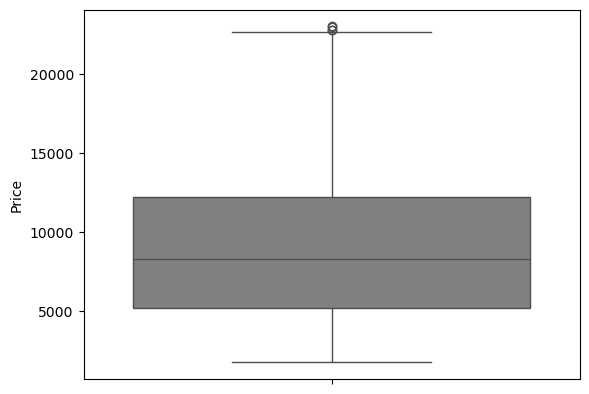

In [77]:
sns.boxplot(y = df.Price, color='gray')
plt.show()

### <b>4) ENCODING

##### <b>1) Date of Journey

In [78]:
#converting object -> datetime format.
#extracting date,Month,year separately and removing Date_of_Journey column.
df['Date_of_Journey'] = pd.to_datetime(df['Date_of_Journey'], format='%d/%m/%Y')
df['Journey_Day'] = df['Date_of_Journey'].dt.day
df['Journey_Month'] = df['Date_of_Journey'].dt.month
#df['Journey_Year'] = df['Date_of_Journey'].dt.year

In [79]:
df.drop('Date_of_Journey', axis=1, inplace=True)

In [80]:
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


##### <b>2) Dep Time

In [81]:
#converting object -> datetime format.
#extracting hours,min separately and removing Dep_Time column.
df['Dep_Time'] = pd.to_datetime(df['Dep_Time'])
df['Dep_Hour'] = df['Dep_Time'].dt.hour
df['Dep_Minute'] = df['Dep_Time'].dt.minute

In [82]:
df.drop('Dep_Time', axis=1, inplace=True)

In [83]:
df.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_Hour,Dep_Minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,16,50


##### <b>3) Arrival_Time

In [84]:
#converting object -> datatime format.
#extracting hours, min separately and removing Arrival_Time column.
df['Arrival_Time'] = pd.to_datetime(df['Arrival_Time'])
df['Arrival_Hour'] = df['Arrival_Time'].dt.hour
df['Arrival_Minute'] = df['Arrival_Time'].dt.minute

In [85]:
df.drop('Arrival_Time', axis=1, inplace = True)

In [86]:
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


##### <b>4) Duration

In [87]:
duration_split = df['Duration'].str.extract(r'(?:(\d+)h)?\s?(?:(\d+)m)?')
df['Duration_Hours'] = duration_split[0].fillna(0).astype(int)
df['Duration_Minutes'] = duration_split[1].fillna(0).astype(int)

In [88]:
df.drop('Duration', axis=1, inplace = True)

In [89]:
df.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute,Duration_Hours,Duration_Minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35,4,45


##### <b>5) Total_Stops

In [90]:
# Map Total_Stops to numeric values
df['Total_Stops'] = df['Total_Stops'].map({'non-stop': 0, '1 stop': 1, '2 stops': 2, '3 stops': 3, '4 stops': 4})

In [91]:
df.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute,Duration_Hours,Duration_Minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,0,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1,No info,13302,1,3,16,50,21,35,4,45


##### <b>6) Route

In [92]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Route_Encoded'] = le.fit_transform(df['Route'])

In [93]:
print(df[['Route_Encoded', 'Price']].corr())

               Route_Encoded     Price
Route_Encoded       1.000000  0.240833
Price               0.240833  1.000000


In [94]:
# the correlation between price and route columns is very low so that we can drop it
df.drop(['Route_Encoded'],axis=1,inplace=True)

In [95]:
df.drop(['Route'],axis=1,inplace=True)

In [96]:
df.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute,Duration_Hours,Duration_Minutes
0,IndiGo,Banglore,New Delhi,0,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,No info,13302,1,3,16,50,21,35,4,45


##### <b>7) Additional_Info

In [97]:
df['Additional_Encoded'] = le.fit_transform(df['Additional_Info'])

In [98]:
print(df[['Additional_Encoded', 'Price']].corr())

                    Additional_Encoded     Price
Additional_Encoded            1.000000 -0.046004
Price                        -0.046004  1.000000


In [99]:
# The correlation between price and additional_info columns is very low so that we can drop it 
df.drop(['Additional_Encoded'], axis=1, inplace=True)

In [100]:
df.drop(['Additional_Info'], axis=1, inplace=True)

In [101]:
df.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_Day,Journey_Month,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute,Duration_Hours,Duration_Minutes
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,4,45


##### <b>8) Airline, Source, Destination

In [102]:
df_encoded = pd.get_dummies(df, columns = ['Airline', 'Source', 'Destination'], drop_first = True)
df_encoded = df_encoded.astype(int)

In [103]:
df_encoded.head()

,Total_Stops,Price,Journey_Day,Journey_Month,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute,Duration_Hours,Duration_Minutes,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,6218,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,13302,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [104]:
df.Duration_Hours.unique()

array([ 2,  7, 19,  5,  4, 15, 21, 25, 13, 12, 26, 22, 23, 20, 10,  6, 11,
        8, 16,  3, 27,  1, 14,  9, 18, 17, 24, 30, 28, 29, 37, 34, 38, 35,
       36, 47, 33, 32, 31, 42, 39,  0, 41, 40])

In [105]:
df_encoded.columns

Index(['Total_Stops', 'Price', 'Journey_Day', 'Journey_Month', 'Dep_Hour',
       'Dep_Minute', 'Arrival_Hour', 'Arrival_Minute', 'Duration_Hours',
       'Duration_Minutes', 'Airline_Air India', 'Airline_GoAir',
       'Airline_IndiGo', 'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi'],
      dtype='object')

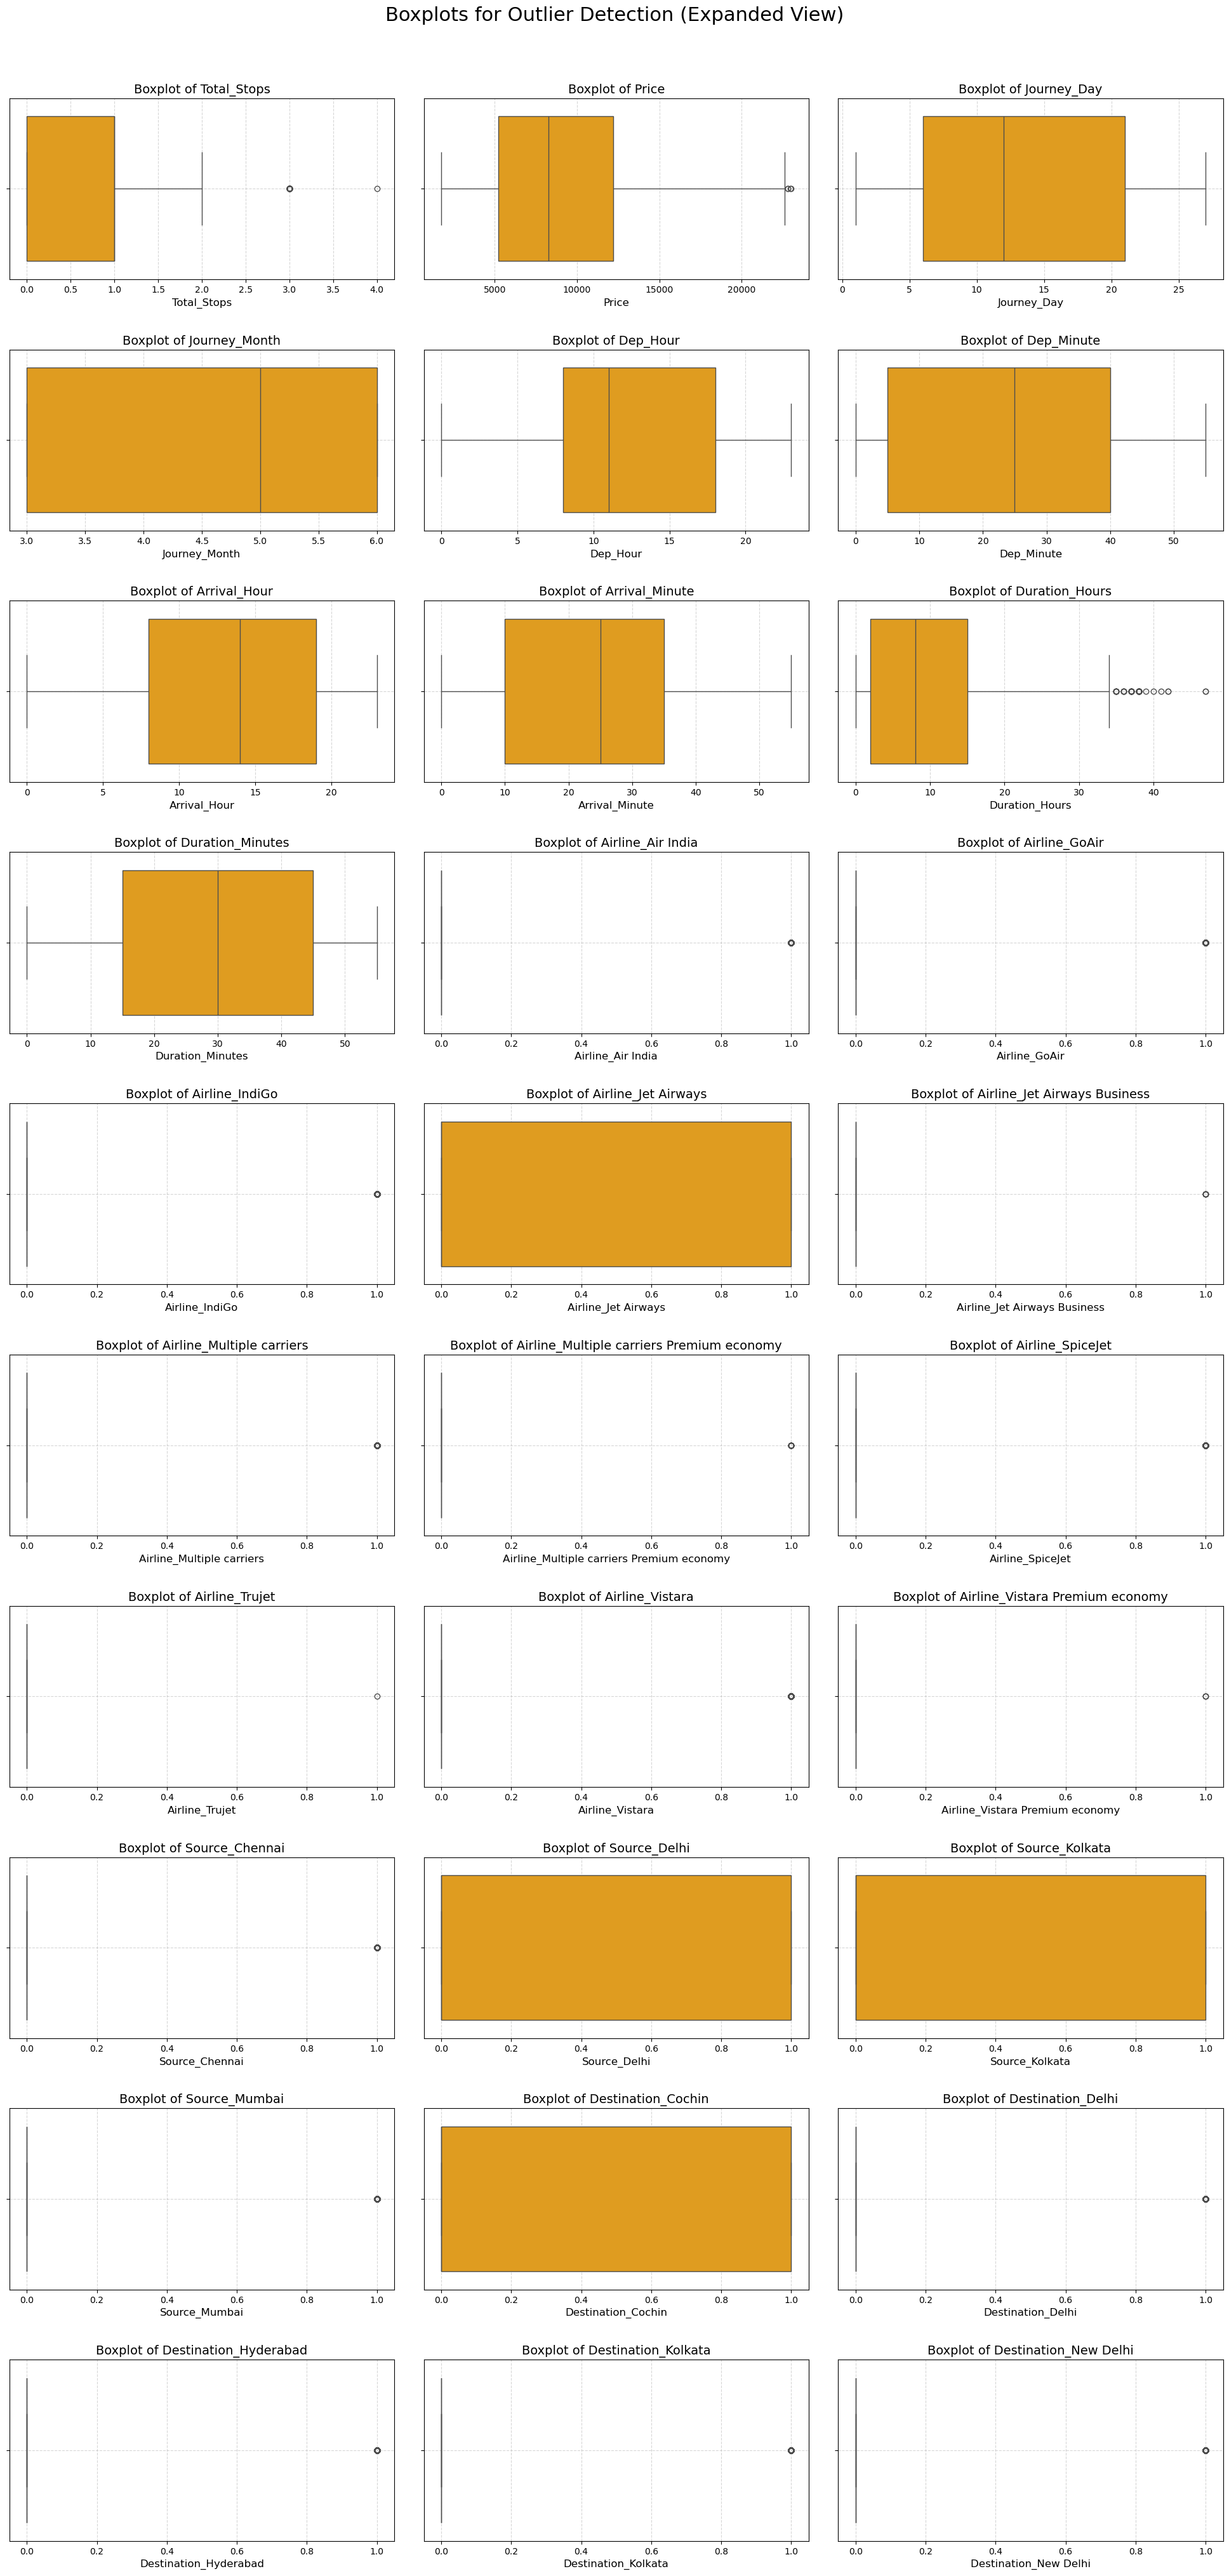

In [106]:
num_columns = 3
num_rows = 10
total_plots = num_columns * num_rows

plt.figure(figsize=(20, 40), facecolor='white')  # Larger figure
plt_num = 1

for column in df_encoded.columns:
    if plt_num <= total_plots:
        ax = plt.subplot(num_rows, num_columns, plt_num)
        sns.boxplot(x=df_encoded[column], color='orange', ax=ax)
        ax.set_title(f'Boxplot of {column}', fontsize=14)
        ax.set_xlabel(column, fontsize=12)
        ax.set_ylabel('')
        ax.grid(True, linestyle='--', alpha=0.5)
        plt_num += 1

plt.tight_layout(pad=3.0)
plt.suptitle('Boxplots for Outlier Detection (Expanded View)', fontsize=22, y=1.02)
plt.show()

#### <b>Handling outliers in Duration_Hours column

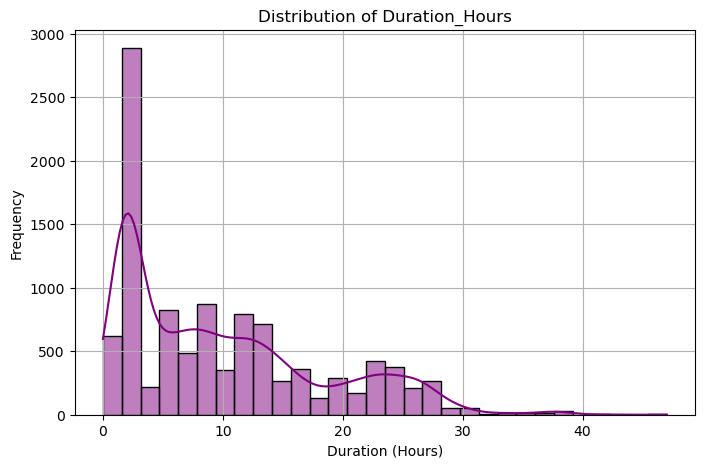

In [107]:
plt.figure(figsize=(8, 5))
sns.histplot(df_encoded['Duration_Hours'], kde=True, color='purple', bins=30)
plt.title('Distribution of Duration_Hours')
plt.xlabel('Duration (Hours)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [108]:
# Duration Hours 
Q1 = df_encoded['Duration_Hours'].quantile(0.25)
Q3 = df_encoded['Duration_Hours'].quantile(0.75)
IQR = Q3 - Q1

In [109]:
print('First Qurtile =',Q1)
print('Last Qurtile =',Q3)
print('Interquartile range =',IQR)

First Qurtile = 2.0
Last Qurtile = 15.0
Interquartile range = 13.0


In [110]:
# Finding the lower limit and upper limit  
Lower_limit = Q1-1.5 * IQR
Upper_limit = Q3+1.5 * IQR

In [111]:
print('Lower_limit =',Lower_limit)
print('Upper_limit =',Upper_limit)

Lower_limit = -17.5
Upper_limit = 34.5


In [112]:
df_encoded.loc[df_encoded['Duration_Hours']>Upper_limit]

,Total_Stops,Price,Journey_Day,Journey_Month,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute,Duration_Hours,Duration_Minutes,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
226,2,18799,3,3,5,25,18,50,37,25,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
553,2,10598,9,3,5,0,19,15,38,15,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
919,3,10991,12,5,12,0,23,15,35,15,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
925,2,19907,6,3,16,50,4,25,35,35,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
966,2,10493,21,5,5,55,19,15,37,20,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9703,2,13748,3,3,5,55,19,15,37,20,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
10020,2,9653,9,5,5,0,19,15,38,15,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
10326,2,11791,3,3,5,50,22,10,40,20,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
10456,2,20694,6,3,19,10,18,50,47,40,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0


In [113]:
len(df_encoded.loc[df_encoded['Duration_Hours']>Upper_limit])/len(df_encoded)

0.006403517155691484

In [114]:
df_encoded.loc[df_encoded['Duration_Hours']<Lower_limit]

,Total_Stops,Price,Journey_Day,Journey_Month,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute,Duration_Hours,Duration_Minutes,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi


In [115]:
# Handling outliers by replacing data with Median as it is below 5 %
df_encoded.loc[df_encoded['Duration_Hours']>Upper_limit,'Duration_Hours'] = df_encoded['Duration_Hours'].median()

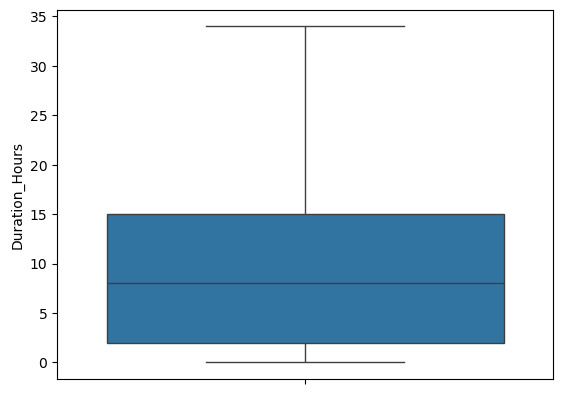

In [116]:
sns.boxplot(y=df_encoded.Duration_Hours)
plt.show()

In [117]:
df_encoded.head()

,Total_Stops,Price,Journey_Day,Journey_Month,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute,Duration_Hours,Duration_Minutes,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,6218,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,13302,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [118]:
df_encoded.isnull().sum()

Total_Stops                                  0
Price                                        0
Journey_Day                                  0
Journey_Month                                0
Dep_Hour                                     0
Dep_Minute                                   0
Arrival_Hour                                 0
Arrival_Minute                               0
Duration_Hours                               0
Duration_Minutes                             0
Airline_Air India                            0
Airline_GoAir                                0
Airline_IndiGo                               0
Airline_Jet Airways                          0
Airline_Jet Airways Business                 0
Airline_Multiple carriers                    0
Airline_Multiple carriers Premium economy    0
Airline_SpiceJet                             0
Airline_Trujet                               0
Airline_Vistara                              0
Airline_Vistara Premium economy              0
Source_Chenna

In [119]:
df_encoded.dtypes

Total_Stops                                  int32
Price                                        int32
Journey_Day                                  int32
Journey_Month                                int32
Dep_Hour                                     int32
Dep_Minute                                   int32
Arrival_Hour                                 int32
Arrival_Minute                               int32
Duration_Hours                               int32
Duration_Minutes                             int32
Airline_Air India                            int32
Airline_GoAir                                int32
Airline_IndiGo                               int32
Airline_Jet Airways                          int32
Airline_Jet Airways Business                 int32
Airline_Multiple carriers                    int32
Airline_Multiple carriers Premium economy    int32
Airline_SpiceJet                             int32
Airline_Trujet                               int32
Airline_Vistara                

In [120]:
df_encoded.nunique()

Total_Stops                                     5
Price                                        1826
Journey_Day                                    10
Journey_Month                                   4
Dep_Hour                                       24
Dep_Minute                                     12
Arrival_Hour                                   24
Arrival_Minute                                 12
Duration_Hours                                 35
Duration_Minutes                               12
Airline_Air India                               2
Airline_GoAir                                   2
Airline_IndiGo                                  2
Airline_Jet Airways                             2
Airline_Jet Airways Business                    2
Airline_Multiple carriers                       2
Airline_Multiple carriers Premium economy       2
Airline_SpiceJet                                2
Airline_Trujet                                  2
Airline_Vistara                                 2


## <b>SCALING

In [121]:
# Scaling for total_stops, journey_Date, journey_month, dep_hr, dep_min,arrival_hr, arrival_min, duration_hours, Duration_min.
features = df_encoded[['Total_Stops', 'Journey_Day', 'Journey_Month', 'Dep_Hour', 
                 'Dep_Minute', 'Arrival_Hour', 'Arrival_Minute', 'Duration_Hours', 'Duration_Minutes']]

In [122]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [123]:
df_scaled = scaler.fit_transform(features)

In [124]:
df1_scaled= pd.DataFrame(df_scaled, columns=features.columns)

In [125]:
df1_scaled.shape

(10463, 9)

In [126]:
df1_scaled.head()

,Total_Stops,Journey_Day,Journey_Month,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute,Duration_Hours,Duration_Minutes
0,-1.214674,1.244539,-1.462170,1.662686,-0.234226,-1.807035,-0.888411,-0.970330,1.290954
1,1.813113,-1.471890,0.256494,-1.305823,1.360247,-0.056494,-0.586640,-0.351249,-0.190267
2,1.813113,-0.527045,1.115825,-0.607350,0.031520,-1.369400,0.016901,1.134547,-1.671488
3,0.299219,-0.172728,0.256494,0.964213,-1.031462,1.402289,0.318672,-0.598881,-0.190267
4,0.299219,-1.471890,-1.462170,0.614977,1.360247,1.110533,0.620443,-0.722698,0.994710


In [127]:
df1_scaled.isnull().sum()

Total_Stops         0
Journey_Day         0
Journey_Month       0
Dep_Hour            0
Dep_Minute          0
Arrival_Hour        0
Arrival_Minute      0
Duration_Hours      0
Duration_Minutes    0
dtype: int64

In [128]:
df_encoded.columns

Index(['Total_Stops', 'Price', 'Journey_Day', 'Journey_Month', 'Dep_Hour',
       'Dep_Minute', 'Arrival_Hour', 'Arrival_Minute', 'Duration_Hours',
       'Duration_Minutes', 'Airline_Air India', 'Airline_GoAir',
       'Airline_IndiGo', 'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi'],
      dtype='object')

In [129]:
non_scaled = ['Airline_Air India', 'Airline_GoAir',
       'Airline_IndiGo', 'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi','Price']

In [130]:
df_non_scaled = df_encoded[non_scaled]

In [131]:
df_non_scaled.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Price
0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3897
1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,7662
2,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,13882
3,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,6218
4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,13302


In [132]:
print(df1_scaled.shape)

(10463, 9)


In [133]:
print(df_non_scaled.shape)

(10463, 21)


In [134]:
df1_scaled.reset_index(drop=True, inplace=True)

In [135]:
df_non_scaled.reset_index(drop=True, inplace=True)

In [136]:
data= pd.concat([df1_scaled, df_non_scaled], axis=1)

In [137]:
data.head()

,Total_Stops,Journey_Day,Journey_Month,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute,Duration_Hours,Duration_Minutes,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Price
0,-1.214674,1.244539,-1.462170,1.662686,-0.234226,-1.807035,-0.888411,-0.970330,1.290954,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3897
1,1.813113,-1.471890,0.256494,-1.305823,1.360247,-0.056494,-0.586640,-0.351249,-0.190267,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,7662
2,1.813113,-0.527045,1.115825,-0.607350,0.031520,-1.369400,0.016901,1.134547,-1.671488,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,13882
3,0.299219,-0.172728,0.256494,0.964213,-1.031462,1.402289,0.318672,-0.598881,-0.190267,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,6218
4,0.299219,-1.471890,-1.462170,0.614977,1.360247,1.110533,0.620443,-0.722698,0.994710,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,13302


## <b>FEATURE ENGINEERING

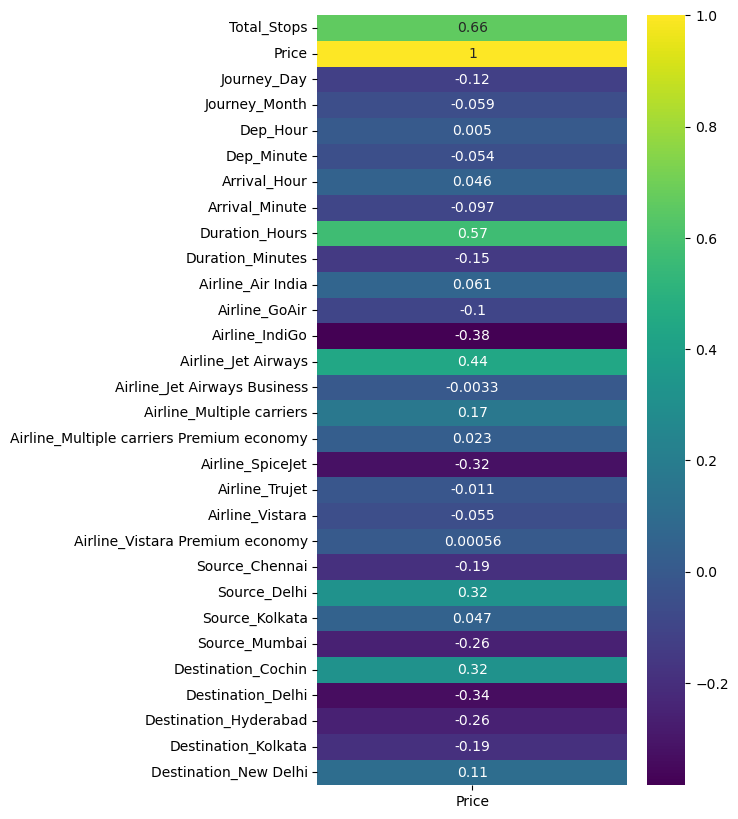

In [138]:
corr=df_encoded.corr()[['Price']]
plt.figure(figsize=(5,10))
sns.heatmap(corr,annot=True,cmap = 'viridis')
plt.show()

<b>Observation
- Total_stops feature has 66% based on price(target column)

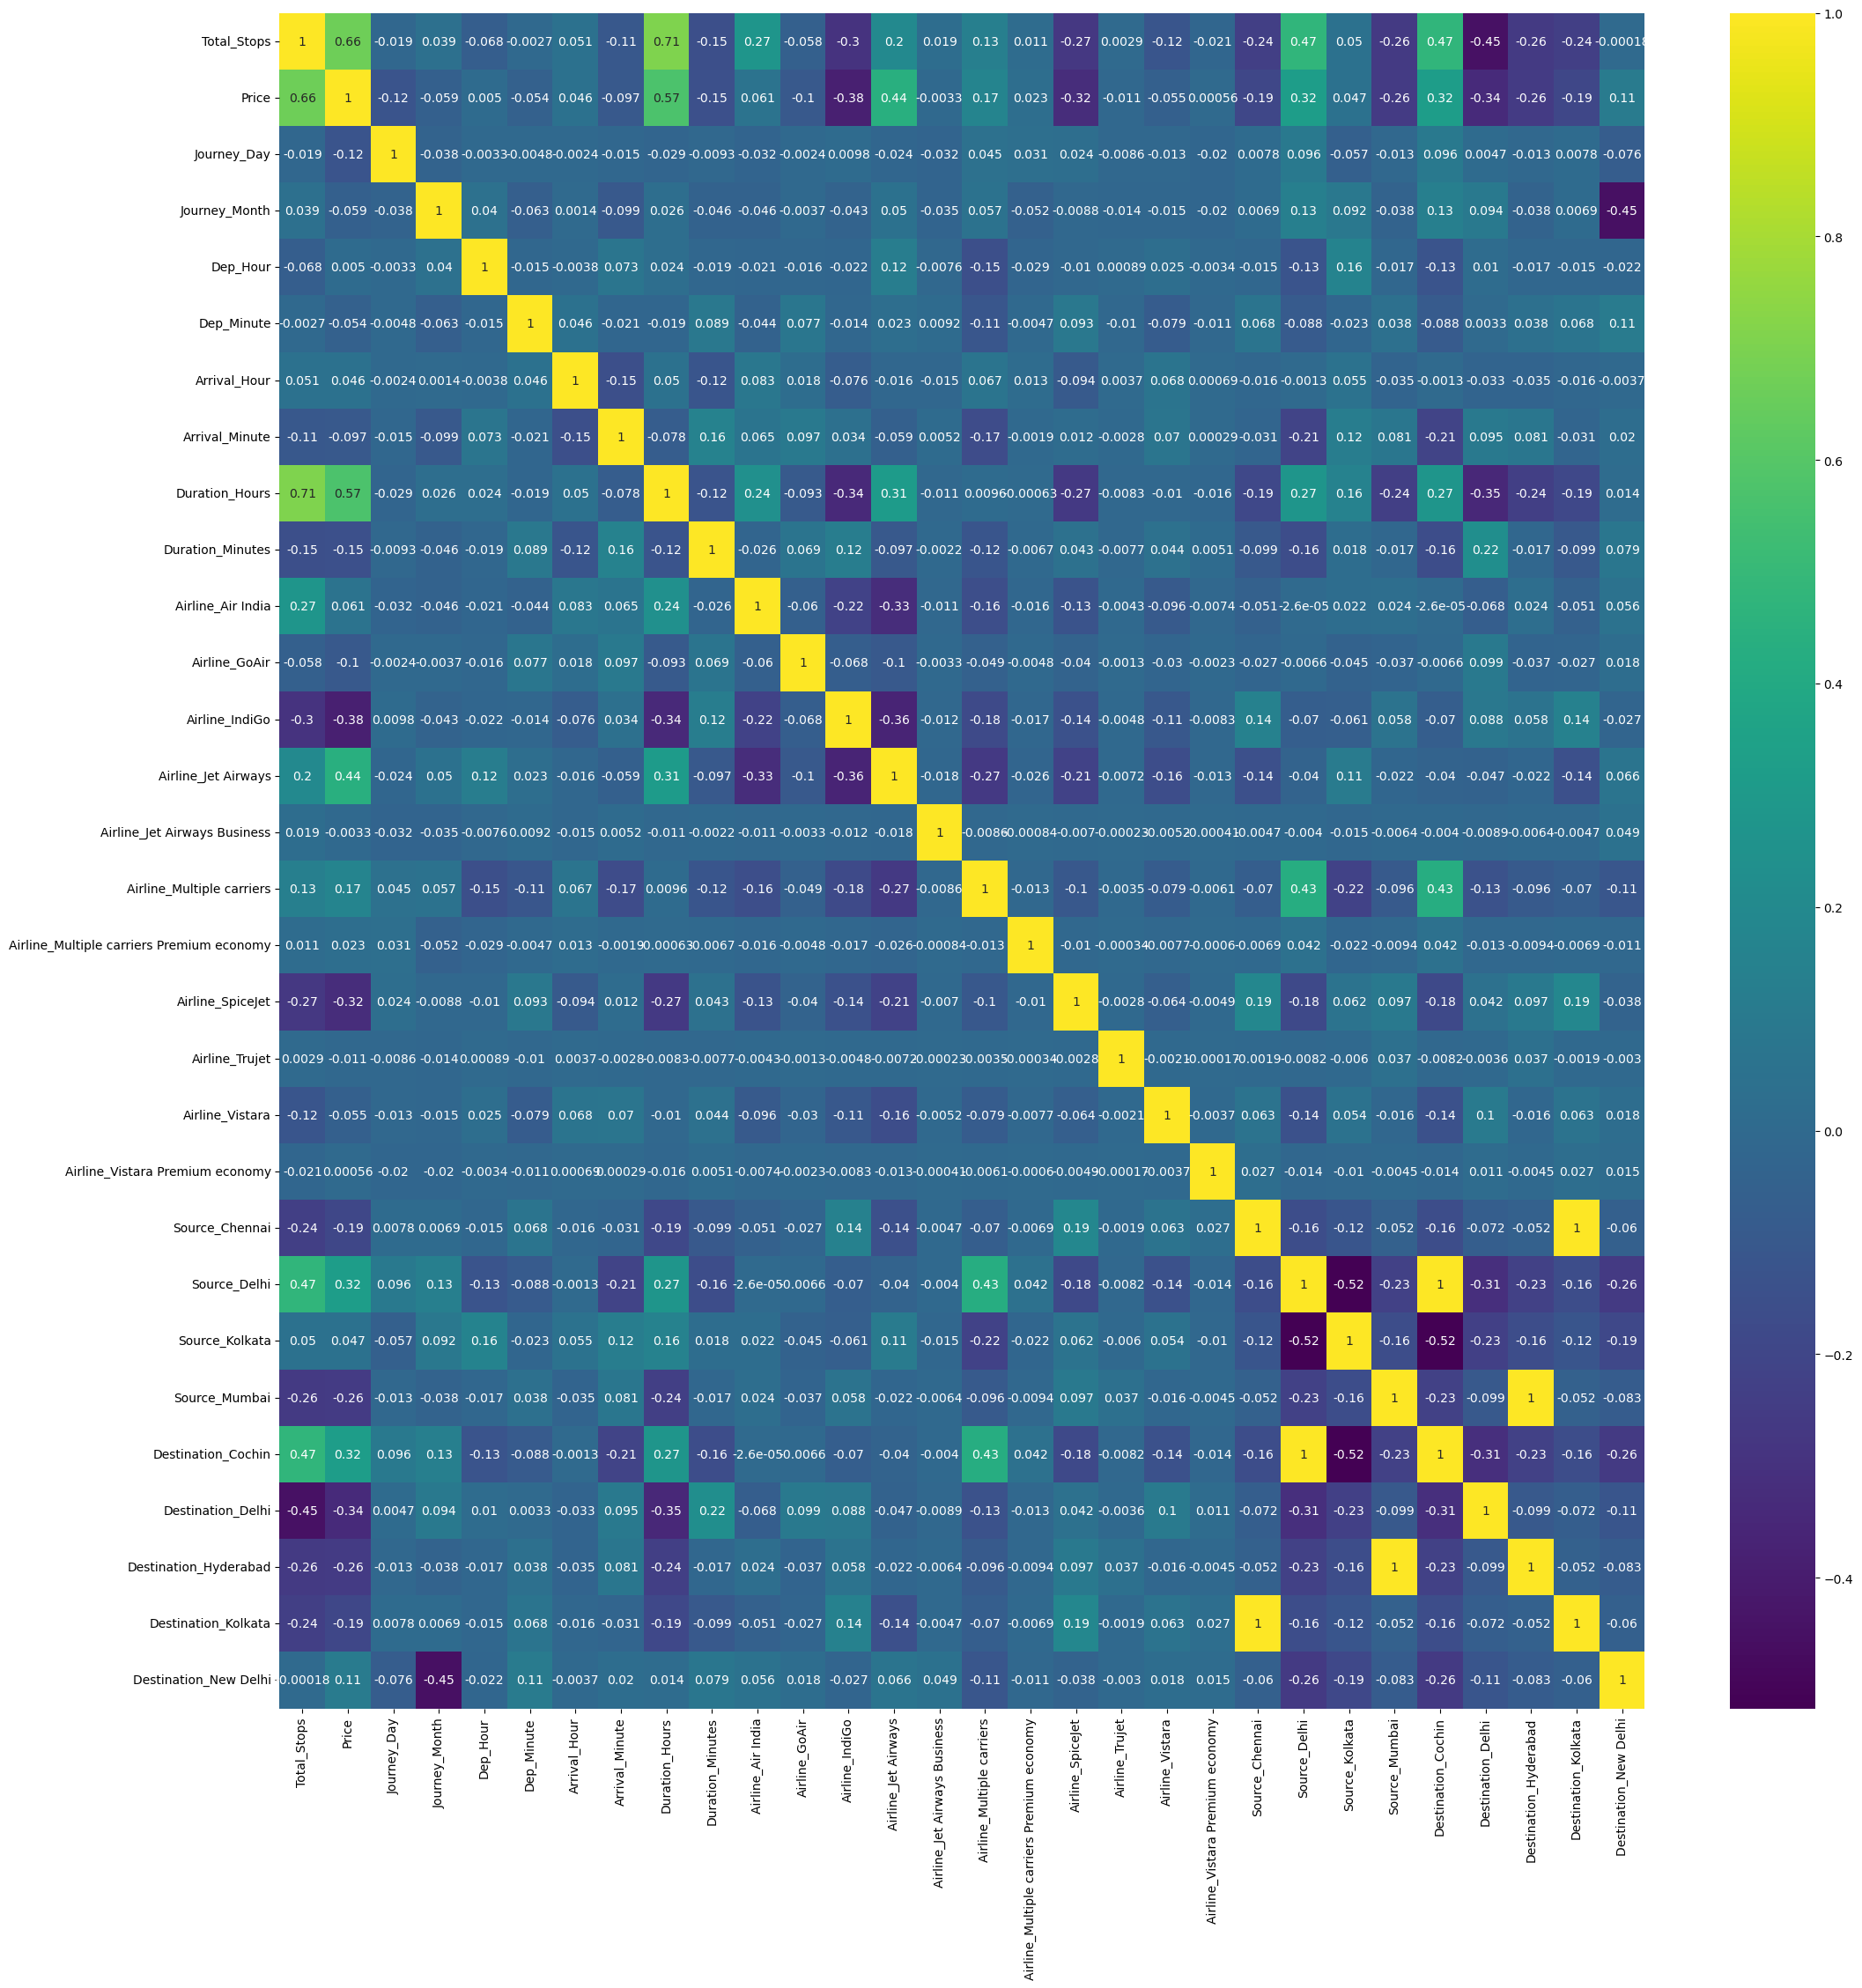

In [139]:
plt.figure(figsize=(25,25))
sns.heatmap(df_encoded.corr(),annot=True,cmap='viridis')
plt.show()

## <b>SPLITING DEPENDENT AND INDEPENDENT COLUMNS

In [140]:
df_encoded.head()

,Total_Stops,Price,Journey_Day,Journey_Month,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute,Duration_Hours,Duration_Minutes,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,6218,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,13302,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [141]:
x=df_encoded.drop('Price',axis=1)
y=df_encoded['Price']

In [142]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [143]:
print(x_train.shape)

(7847, 29)


In [144]:
print(x_test.shape)

(2616, 29)


In [145]:
print(y_train.shape)

(7847,)


In [146]:
print(y_test.shape)

(2616,)


# <b>TASK 2
### <b>CREATE A PREDICTIVE MODEL WHICH WILL HELP THE CUSTOMERS TO PREDICT FUTURE FLIGHT PRICES AND PLAN THEIR JOURNEY ACCORDINGLY.

## <b>EVALUATION MATRICS

In [147]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

def model_evaluation(model, x_train, y_train, x_test, y_test):
    # Predict on the training data
    y_train_pred = model.predict(x_train)
    
    # Calculate metrics for the training set
    train_r2 = r2_score(y_train, y_train_pred)
    train_mae = mean_absolute_error(y_train, y_train_pred)
    train_mse = mean_squared_error(y_train, y_train_pred)
    train_rmse = np.sqrt(train_mse)

    # Print training data metrics
    print(f"Training Data R-squared: {train_r2:.2f}")
    print(f"Training Data MAE: {train_mae:.2f}")
    print(f"Training Data MSE: {train_mse:.2f}")
    print(f"Training Data RMSE: {train_rmse:.2f}")

    # Predict on the test data
    y_test_pred = model.predict(x_test)

    # Calculate metrics for the test set
    test_r2 = r2_score(y_test, y_test_pred)
    test_mae = mean_absolute_error(y_test, y_test_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    test_rmse = np.sqrt(test_mse)

    # Print test data metrics
    print(f"\nTest Data R-squared: {test_r2:.2f}")
    print(f"Test Data MAE: {test_mae:.2f}")
    print(f"Test Data MSE: {test_mse:.2f}")
    print(f"Test Data RMSE: {test_rmse:.2f}")

    metrics_df = pd.DataFrame({
        "Metric": ["R-squared", "MAE", "MSE", "RMSE"],
        "Training": [train_r2, train_mae, train_mse, train_rmse],
        "Testing": [test_r2, test_mae, test_mse, test_rmse]
    })
    metrics_df["Training"] = metrics_df["Training"].apply(lambda x: f"{x:,.2f}")
    metrics_df["Testing"] = metrics_df["Testing"].apply(lambda x: f"{x:,.2f}")
    return metrics_df

## <b>MODEL TRAINING

### <b>1) LINEAR REGRESSION

In [148]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import*

In [149]:
m1=LinearRegression() #object creation

In [150]:
m1.fit(x_train,y_train) #training

LinearRegression()

In [151]:
y_predict=m1.predict(x_test)

In [152]:
pd.DataFrame({'Actual':y_test,'Prediction':y_predict,'error':y_test-y_predict})

,Actual,Prediction,error
7659,15894,11270.052280,4623.947720
8235,8366,11822.074477,-3456.074477
3585,3943,4036.863931,-93.863931
7625,8085,9457.463561,-1372.463561
4812,4049,8222.144397,-4173.144397
...,...,...,...
9015,11728,12081.885177,-353.885177
6025,11507,14090.666081,-2583.666081
2840,10197,10399.290009,-202.290009
4896,6637,10459.900076,-3822.900076


In [153]:
model_evaluation(m1, x_train, y_train, x_test, y_test)

Training Data R-squared: 0.64
Training Data MAE: 1827.35
Training Data MSE: 6045195.82
Training Data RMSE: 2458.70

Test Data R-squared: 0.64
Test Data MAE: 1816.74
Test Data MSE: 5811518.81
Test Data RMSE: 2410.71


,Metric,Training,Testing
0,R-squared,0.64,0.64
1,MAE,"1,827.35","1,816.74"
2,MSE,"6,045,195.82","5,811,518.81"
3,RMSE,"2,458.70","2,410.71"


<b>Observation
- R² (0.64): Model explains 64% of variance, indicating decent performance.
- MAE, MSE, RMSE: Similar values for both training and test data, showing consistent and stable performance.
- The model performs well on both training and test data, without overfitting or underfitting.

In [154]:
# checking cross validation scores
from sklearn.model_selection import cross_val_score

In [155]:
scores=cross_val_score(m1,x,y,cv=3,scoring='r2')

In [156]:
print(scores)
print('cross validation score:',scores.mean())
print('std:',scores.std())

[0.63312335 0.63387855 0.63280416]
cross validation score: 0.6332686853313403
std: 0.00045049301742270396


<b>Observation
- cv score : 0.633 -> the model explains 63.3 % of the variance
- std : 0.00045 -> indicates stable and consistent performance across folds
- conclusion: The model generalizes well with minimal vairation in performance.

### <b>2) SUPPORT VECTOR MACHINE REGRESSOR

In [157]:
from sklearn.svm import SVR

In [158]:
m2=SVR()

In [159]:
m2.fit(x_train,y_train)

SVR()

In [160]:
y_pred=m2.predict(x_test)

In [161]:
y_pred

array([8128.20060514, 8080.85859014, 8001.38360252, ..., 8432.39797174,
       8243.11095776, 7953.53550667])

In [162]:
pd.DataFrame({'Actual':y_test,'Prediction':y_pred,'error':y_test-y_pred})

,Actual,Prediction,error
7659,15894,8128.200605,7765.799395
8235,8366,8080.858590,285.141410
3585,3943,8001.383603,-4058.383603
7625,8085,8523.805986,-438.805986
4812,4049,7977.871265,-3928.871265
...,...,...,...
9015,11728,8170.670901,3557.329099
6025,11507,8312.728739,3194.271261
2840,10197,8432.397972,1764.602028
4896,6637,8243.110958,-1606.110958


In [163]:
model_evaluation(m2,x_train,y_train,x_test,y_test)

Training Data R-squared: 0.01
Training Data MAE: 3351.45
Training Data MSE: 16396845.57
Training Data RMSE: 4049.30

Test Data R-squared: 0.01
Test Data MAE: 3304.09
Test Data MSE: 15732026.79
Test Data RMSE: 3966.36


,Metric,Training,Testing
0,R-squared,0.01,0.01
1,MAE,"3,351.45","3,304.09"
2,MSE,"16,396,845.57","15,732,026.79"
3,RMSE,"4,049.30","3,966.36"


<b>Observation
- R-squared of 0.01, high MAE (3300–3350), MSE, and RMSE indicate poor model performance.
- The model's predictions are inaccurate and need improvement.

In [164]:
scores=cross_val_score(m2,x,y,cv=3,scoring='r2')

In [165]:
print(scores)
print('cross validation score:',scores.mean())
print('std:',scores.std())

[-0.00740501  0.01124912  0.01540058]
cross validation score: 0.0064148961979773045
std: 0.009918033228009219


<b>Observation
- cv score: 0.0064 and SD: 0.0099 -> the model indicates poor perfomance

#### <b>HYPERPARAMETER TUNING FOR SVR

In [166]:
from sklearn.model_selection import*

In [167]:
M2=SVR()
param_grid={
    'C':[0.1,1,10,100],
    'gamma':[1,0.1,0.01,0.001], 
    'kernel':['linear']
}

grid= GridSearchCV(M2,
                   param_grid,
                   cv=3,
                   verbose=1,
                   scoring='r2',
                   n_jobs=-1)

In [168]:
grid.fit(x_train,y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


GridSearchCV(cv=3, estimator=SVR(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['linear']},
             scoring='r2', verbose=1)

In [169]:
print("Best parameters found:",grid.best_params_)

Best parameters found: {'C': 100, 'gamma': 1, 'kernel': 'linear'}


In [170]:
print('Best Estimators:',grid.best_estimator_)

Best Estimators: SVR(C=100, gamma=1, kernel='linear')


In [171]:
best_svr_m2=SVR(C=100,gamma=1,kernel='linear')

In [172]:
best_svr_m2.fit(x_train,y_train)

SVR(C=100, gamma=1, kernel='linear')

In [173]:
y_pred=best_svr_m2.predict(x_test)

In [174]:
y_pred

array([10985.12422441, 11328.95344611,  4206.21006813, ...,
        9976.61166625, 10004.78229682,  5152.37044299])

In [175]:
pd.DataFrame({'Actual':y_test,'Prediction':y_pred,'error':y_test-y_pred})

,Actual,Prediction,error
7659,15894,10985.124224,4908.875776
8235,8366,11328.953446,-2962.953446
3585,3943,4206.210068,-263.210068
7625,8085,8860.866568,-775.866568
4812,4049,8068.849308,-4019.849308
...,...,...,...
9015,11728,12076.907451,-348.907451
6025,11507,13187.309236,-1680.309236
2840,10197,9976.611666,220.388334
4896,6637,10004.782297,-3367.782297


In [176]:
model_evaluation(best_svr_m2,x_train,y_train,x_test,y_test)

Training Data R-squared: 0.61
Training Data MAE: 1786.61
Training Data MSE: 6383173.53
Training Data RMSE: 2526.49

Test Data R-squared: 0.61
Test Data MAE: 1780.48
Test Data MSE: 6140180.14
Test Data RMSE: 2477.94


,Metric,Training,Testing
0,R-squared,0.61,0.61
1,MAE,"1,786.61","1,780.48"
2,MSE,"6,383,173.53","6,140,180.14"
3,RMSE,"2,526.49","2,477.94"


<b>Observation
- The best parameter after hyper parameter tuning we got -> SVR(C=100, gamma=1, kernel='linear')
- The r2 score is increased from 0.01 to 0.61 for both training and testing data after tuning, indicating a decent performance.
- MAE decreased from 1786.61 to 1780.48.
- MSE dropped from 6,383,173.53 to 6,140,180.14.
- RMSE reduced from 2526.49 to 2477.94.
- The model is now generalizes well with minimal performance after hyperparameter tuning.

In [177]:
scores=cross_val_score(best_svr_m2,x,y,cv=3,scoring='r2')

In [178]:
print(scores)
print('cross validation score:',scores.mean())
print('std:',scores.std())

[0.61674469 0.60712331 0.61636457]
cross validation score: 0.6134108574098196
std: 0.004448672336888472


<b>Observation
- cv score : 0.61 and SD: 0.0044 -> the model shows significant improvement over the preivous model

### <b>3) DECISION TREE REGRESSOR

In [179]:
from sklearn.tree import DecisionTreeRegressor

In [180]:
m3=DecisionTreeRegressor()

In [181]:
m3.fit(x_train,y_train)

DecisionTreeRegressor()

In [182]:
y_pred=m3.predict(x_test)

In [183]:
y_pred

array([14214., 11003.,  3943., ..., 10197., 12537.,  5613.])

In [184]:
pd.DataFrame({'Actual':y_test,'Prediction':y_pred,'error':y_test-y_pred})

,Actual,Prediction,error
7659,15894,14214.0,1680.0
8235,8366,11003.0,-2637.0
3585,3943,3943.0,0.0
7625,8085,8085.0,0.0
4812,4049,7303.0,-3254.0
...,...,...,...
9015,11728,12303.0,-575.0
6025,11507,11830.0,-323.0
2840,10197,10197.0,0.0
4896,6637,12537.0,-5900.0


In [185]:
model_evaluation(m3,x_train,y_train,x_test,y_test)

Training Data R-squared: 0.96
Training Data MAE: 291.17
Training Data MSE: 589318.87
Training Data RMSE: 767.67

Test Data R-squared: 0.66
Test Data MAE: 1389.83
Test Data MSE: 5494765.96
Test Data RMSE: 2344.09


,Metric,Training,Testing
0,R-squared,0.96,0.66
1,MAE,291.17,"1,389.83"
2,MSE,"589,318.87","5,494,765.96"
3,RMSE,767.67,"2,344.09"


<b>Observation
- R2 score for training 0.96 and for testing 0.66 -> the model performs well on training data and more less on unseen data -> which indicates overfitting.
- Need hyperparameter tuning.

In [186]:
scores=cross_val_score(m3,x,y,cv=3,scoring='r2')

In [187]:
print(scores)
print('cross validation score:',scores.mean())
print('std:',scores.std())

[0.66397594 0.68609288 0.64395001]
cross validation score: 0.6646729431223375
std: 0.017211811802618614


<b>Observation
- cv score : 0.668 and SD: 0.012 -> model performance is moderate.

#### <b>HYPERPARAMETER TUNING FOR DECISION TREE

In [188]:
param_grid = {
    'max_depth': [5, 10, 15, 20],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10, 20],  # Minimum samples required to split a node
    'min_samples_leaf': [1, 2, 4, 10],  # Minimum samples required to be at a leaf node
    'criterion': ['squared_error', 'friedman_mse'],  # For regression, use "mse" or "mae"
    'splitter': ['best', 'random'],  # Strategy used to split at each node
    'max_leaf_nodes': [10, 20, 50]  # Maximum number of leaf nodes
}

In [189]:
dt=DecisionTreeRegressor()

In [190]:
gridsearch = GridSearchCV(estimator=dt,
                          param_grid=param_grid,
                          cv=3,
                          n_jobs=-1,
                          verbose=1,
                          scoring='r2',
                          error_score='raise')

In [191]:
gridsearch.fit(x_train, y_train)

Fitting 3 folds for each of 768 candidates, totalling 2304 fits


GridSearchCV(cv=3, error_score='raise', estimator=DecisionTreeRegressor(),
             n_jobs=-1,
             param_grid={'criterion': ['squared_error', 'friedman_mse'],
                         'max_depth': [5, 10, 15, 20],
                         'max_leaf_nodes': [10, 20, 50],
                         'min_samples_leaf': [1, 2, 4, 10],
                         'min_samples_split': [2, 5, 10, 20],
                         'splitter': ['best', 'random']},
             scoring='r2', verbose=1)

In [192]:
print("Best parameters found:",gridsearch.best_params_)

Best parameters found: {'criterion': 'squared_error', 'max_depth': 10, 'max_leaf_nodes': 50, 'min_samples_leaf': 4, 'min_samples_split': 20, 'splitter': 'best'}


In [193]:
print('Best Estimators:',gridsearch.best_estimator_)

Best Estimators: DecisionTreeRegressor(max_depth=10, max_leaf_nodes=50, min_samples_leaf=4,
                      min_samples_split=20)


In [194]:
best_dt=DecisionTreeRegressor(max_depth=10,
                              max_leaf_nodes=50,
                              min_samples_leaf=4,
                              min_samples_split=20)

In [195]:
best_dt.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=10, max_leaf_nodes=50, min_samples_leaf=4,
                      min_samples_split=20)

In [196]:
y_pred=best_dt.predict(x_test)

In [197]:
pd.DataFrame({'Actual':y_test,'Prediction':y_pred,'error':y_test-y_pred})

,Actual,Prediction,error
7659,15894,12097.251397,3796.748603
8235,8366,12097.251397,-3731.251397
3585,3943,4408.212082,-465.212082
7625,8085,8154.856263,-69.856263
4812,4049,6236.537572,-2187.537572
...,...,...,...
9015,11728,12097.251397,-369.251397
6025,11507,12926.342593,-1419.342593
2840,10197,11697.748792,-1500.748792
4896,6637,9572.423913,-2935.423913


In [198]:
model_evaluation(best_dt,x_train,y_train,x_test,y_test)

Training Data R-squared: 0.75
Training Data MAE: 1494.17
Training Data MSE: 4132845.55
Training Data RMSE: 2032.94

Test Data R-squared: 0.75
Test Data MAE: 1522.53
Test Data MSE: 4059659.57
Test Data RMSE: 2014.86


,Metric,Training,Testing
0,R-squared,0.75,0.75
1,MAE,"1,494.17","1,522.53"
2,MSE,"4,132,845.55","4,059,659.57"
3,RMSE,"2,032.94","2,014.86"


<b>Observation
- R2 score for both train and test data : 0.75 -> good fit and consistent performance.
- The model is performing well after tuning and the model is now generalized.

In [199]:
scores=cross_val_score(best_dt,x,y,cv=3,scoring='r2')

In [200]:
print(scores)
print('cross validation score:',scores.mean())
print('std:',scores.std())

[0.72369467 0.73659421 0.71205983]
cross validation score: 0.7241162360450136
std: 0.010020554207894855


<b>Observation
- cv score: 0.724 and SD : 0.0099 -> model performance is moderate.

### <b>4) RANDOM FOREST REGRESSOR

In [201]:
from sklearn.ensemble import RandomForestRegressor

In [202]:
m4=RandomForestRegressor()

In [203]:
m4.fit(x_train,y_train)

RandomForestRegressor()

In [204]:
y_pred=m4.predict(x_test)

In [205]:
pd.DataFrame({'Actual':y_test,'Prediction':y_pred,'error':y_test-y_pred})

,Actual,Prediction,error
7659,15894,13551.770000,2342.230000
8235,8366,10010.430000,-1644.430000
3585,3943,3978.140000,-35.140000
7625,8085,8436.820000,-351.820000
4812,4049,5812.629333,-1763.629333
...,...,...,...
9015,11728,10193.662500,1534.337500
6025,11507,11821.678667,-314.678667
2840,10197,10414.450000,-217.450000
4896,6637,9493.710000,-2856.710000


In [206]:
model_evaluation(m4,x_train,y_train,x_test,y_test)

Training Data R-squared: 0.95
Training Data MAE: 553.06
Training Data MSE: 852513.13
Training Data RMSE: 923.32

Test Data R-squared: 0.79
Test Data MAE: 1187.37
Test Data MSE: 3359569.32
Test Data RMSE: 1832.91


,Metric,Training,Testing
0,R-squared,0.95,0.79
1,MAE,553.06,"1,187.37"
2,MSE,"852,513.13","3,359,569.32"
3,RMSE,923.32,"1,832.91"


<b>Observation
- R2 score for training 0.95 and for testing 0.79 -> the model performs well on training data and more less on unseen data -> which indicates overfitting.
- Need hyperparameter tuning.

In [207]:
scores=cross_val_score(m4,x,y,cv=3,scoring='r2')

In [208]:
print(scores)
print('cross validation score:',scores.mean())
print('std:',scores.std())

[0.79900868 0.80093913 0.78119344]
cross validation score: 0.7937137464815517
std: 0.008888205705056195


<b>Observation
- cv score: 0.79 and SD : 0.0099 -> model performance is strong.

#### <b>HYPERPARAMETER TUNING FOR RANDOM FOREST REGRESSOR

In [209]:
rf_dt=RandomForestRegressor(max_depth=10,
                            max_leaf_nodes=50,
                            min_samples_leaf=4,
                            min_samples_split=20)

In [210]:
rf_dt.fit(x_train,y_train)

RandomForestRegressor(max_depth=10, max_leaf_nodes=50, min_samples_leaf=4,
                      min_samples_split=20)

In [211]:
y_pred=rf_dt.predict(x_test)

In [212]:
pd.DataFrame({'Actual':y_test,'Prediction':y_pred,'error':y_test-y_pred})

,Actual,Prediction,error
7659,15894,11872.441199,4021.558801
8235,8366,11869.834394,-3503.834394
3585,3943,4407.652405,-464.652405
7625,8085,8261.767109,-176.767109
4812,4049,6360.915449,-2311.915449
...,...,...,...
9015,11728,12140.165133,-412.165133
6025,11507,12864.604861,-1357.604861
2840,10197,10617.199752,-420.199752
4896,6637,9372.904203,-2735.904203


In [213]:
model_evaluation(rf_dt,x_train,y_train,x_test,y_test)

Training Data R-squared: 0.78
Training Data MAE: 1425.52
Training Data MSE: 3654930.81
Training Data RMSE: 1911.79

Test Data R-squared: 0.76
Test Data MAE: 1471.15
Test Data MSE: 3785925.74
Test Data RMSE: 1945.75


,Metric,Training,Testing
0,R-squared,0.78,0.76
1,MAE,"1,425.52","1,471.15"
2,MSE,"3,654,930.81","3,785,925.74"
3,RMSE,"1,911.79","1,945.75"


<b>Observation
- Here I used the hyperparameters which i got for decisiontree regressor.
- I got r2 score as 0.78 for training and 0.76 for testing a slight improvement from decision tree regressor.
- The model performance is good and now it is generalised.

In [214]:
scores=cross_val_score(rf_dt,x,y,cv=3,scoring='r2')

In [215]:
print(scores)
print('cross validation score:',scores.mean())
print('std:',scores.std())

[0.75853033 0.7563735  0.74845666]
cross validation score: 0.7544534949293862
std: 0.004330859228918027


<b>Observation
- cv score: 0.75 -> model performance is moderate.
- HYPERPARAMETER TUNING FOR RANDOM FOREST

In [216]:
param_grid = {
    'n_estimators': [200, 300, 400],
    'max_depth': [10, 15, 20, None],
    'min_samples_split': [10, 20],
    'min_samples_leaf': [5, 10, 15],
    'max_features': ['sqrt', 'log2',None]
}

In [217]:
rf = RandomForestRegressor(random_state=42)

In [218]:
grid = GridSearchCV(estimator=rf,
                    param_grid=param_grid,
                    cv=5,
                    scoring='r2',
                    n_jobs=-1,
                    verbose=1,
                    error_score='raise')

In [219]:
grid.fit(x_train, y_train)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


GridSearchCV(cv=5, error_score='raise',
             estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [10, 15, 20, None],
                         'max_features': ['sqrt', 'log2', None],
                         'min_samples_leaf': [5, 10, 15],
                         'min_samples_split': [10, 20],
                         'n_estimators': [200, 300, 400]},
             scoring='r2', verbose=1)

In [220]:
print("Best parameters found:",grid.best_params_)

Best parameters found: {'max_depth': 15, 'max_features': None, 'min_samples_leaf': 5, 'min_samples_split': 10, 'n_estimators': 400}


In [221]:
print('Best Estimators:',grid.best_estimator_)

Best Estimators: RandomForestRegressor(max_depth=15, max_features=None, min_samples_leaf=5,
                      min_samples_split=10, n_estimators=400, random_state=42)


In [222]:
best_rf=RandomForestRegressor(max_depth=15,
                              max_features=None,
                              min_samples_leaf=5,
                              min_samples_split=10,
                              n_estimators=400,
                              random_state=42)

In [223]:
best_rf.fit(x_train,y_train)

RandomForestRegressor(max_depth=15, max_features=None, min_samples_leaf=5,
                      min_samples_split=10, n_estimators=400, random_state=42)

In [224]:
model_evaluation(best_rf,x_train,y_train,x_test,y_test)

Training Data R-squared: 0.89
Training Data MAE: 912.72
Training Data MSE: 1896939.75
Training Data RMSE: 1377.29

Test Data R-squared: 0.82
Test Data MAE: 1150.71
Test Data MSE: 2866979.51
Test Data RMSE: 1693.22


,Metric,Training,Testing
0,R-squared,0.89,0.82
1,MAE,912.72,"1,150.71"
2,MSE,"1,896,939.75","2,866,979.51"
3,RMSE,"1,377.29","1,693.22"


<b>Observation
- r2 score i got 0.95 for training and 0.79 for testing before tuning .
- Now r2 socre for train 0.89 and test 0.82-> the model is now improved / generalized after tuning.

In [225]:
scores=cross_val_score(best_rf,x,y,cv=3,scoring='r2')

In [226]:
print(scores)
print('cross validation score:',scores.mean())
print('std:',scores.std())

[0.81707305 0.81443975 0.79709732]
cross validation score: 0.8095367107149812
std: 0.00886142715108341


<b>Observation
- cv score: 0.81 -> the mdoel performs well

### <b>5) GRADIENT BOOSTING

In [227]:
from sklearn.ensemble import GradientBoostingRegressor

In [228]:
m5=GradientBoostingRegressor()

In [229]:
m5.fit(x_train,y_train)

GradientBoostingRegressor()

In [230]:
y_pred=m5.predict(x_test)

In [231]:
y_pred

array([11335.82084512, 11540.56829658,  4822.32926212, ...,
       10421.06714128,  8755.29431628,  5271.70975299])

In [232]:
pd.DataFrame({'Actual':y_test,'Prediction':y_pred,'error':y_test-y_pred})

,Actual,Prediction,error
7659,15894,11335.820845,4558.179155
8235,8366,11540.568297,-3174.568297
3585,3943,4822.329262,-879.329262
7625,8085,8865.207226,-780.207226
4812,4049,6550.355732,-2501.355732
...,...,...,...
9015,11728,10700.813743,1027.186257
6025,11507,13320.007359,-1813.007359
2840,10197,10421.067141,-224.067141
4896,6637,8755.294316,-2118.294316


In [233]:
model_evaluation(m5,x_train,y_train,x_test,y_test)

Training Data R-squared: 0.76
Training Data MAE: 1467.69
Training Data MSE: 3949857.68
Training Data RMSE: 1987.42

Test Data R-squared: 0.75
Test Data MAE: 1494.87
Test Data MSE: 3973524.24
Test Data RMSE: 1993.37


,Metric,Training,Testing
0,R-squared,0.76,0.75
1,MAE,"1,467.69","1,494.87"
2,MSE,"3,949,857.68","3,973,524.24"
3,RMSE,"1,987.42","1,993.37"


<b>Observation
- r2 score for training 0.76 and testing 0.75 -> this implies that the performance the model is similar for both training and testing data.
- The model generalizes well with overfitting.
- Still we try to do hyperparameter tuning to increase the performance of the model.

In [234]:
scores=cross_val_score(m5,x,y,cv=3,scoring='r2')

In [235]:
print(scores)
print('cross validation score:',scores.mean())
print('std:',scores.std())

[0.74967101 0.75418597 0.7420433 ]
cross validation score: 0.7486334284312685
std: 0.0050112253330094015


<b>Observation
- cv score 0.74 -> indicates consistent performance across different folds .
- The model generalizes well.

#### <b>HYPERPARAMETER TUNING FOR GRADIENT BOOSTING

In [236]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

In [237]:
gb = GradientBoostingRegressor()

In [238]:
grid = GridSearchCV(estimator=gb,
                    scoring='r2',
                    param_grid=param_grid,
                    cv=5,
                    verbose=1,
                    n_jobs=-1,
                    error_score='raise')

In [239]:
grid.fit(x_train, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=5, error_score='raise', estimator=GradientBoostingRegressor(),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [50, 100, 200]},
             scoring='r2', verbose=1)

In [240]:
print("Best parameters found:",grid.best_params_)

Best parameters found: {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 200}


In [241]:
print('Best Estimators:',grid.best_estimator_)

Best Estimators: GradientBoostingRegressor(learning_rate=0.2, max_depth=5, n_estimators=200)


In [242]:
best_gb=GradientBoostingRegressor(learning_rate=0.2,
                                  max_depth=5,
                                  n_estimators=200)

In [243]:
best_gb.fit(x_train,y_train)

GradientBoostingRegressor(learning_rate=0.2, max_depth=5, n_estimators=200)

In [244]:
model_evaluation(best_gb,x_train,y_train,x_test,y_test)

Training Data R-squared: 0.91
Training Data MAE: 860.42
Training Data MSE: 1480742.16
Training Data RMSE: 1216.86

Test Data R-squared: 0.83
Test Data MAE: 1138.07
Test Data MSE: 2672590.27
Test Data RMSE: 1634.81


,Metric,Training,Testing
0,R-squared,0.91,0.83
1,MAE,860.42,"1,138.07"
2,MSE,"1,480,742.16","2,672,590.27"
3,RMSE,"1,216.86","1,634.81"


<b>Observation
- r2 score for training 0.76 and testing 0.75 before tuning.
- After tuning i got r2 score as 0.91 for training and 0.83 for testing -> indicates that model is improved compared to previous.
- There is no significant overfitting is present , the model is generalized.

In [245]:
scores=cross_val_score(best_gb,x,y,cv=3,scoring='r2')

In [246]:
print(scores)
print('cross validation score:',scores.mean())
print('std:',scores.std())

[0.83109001 0.83414704 0.81174305]
cross validation score: 0.8256600335341439
std: 0.009919615188011089


<b>Observation
- cv score 0.83 -> the model performs well across different folds.
- The model generalizes well.

### <b>6) XGBOOSTING

In [247]:
from xgboost import XGBRegressor

In [248]:
m6 = XGBRegressor()

In [249]:
m6.fit(x_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [250]:
y_pred=m6.predict(x_test)

In [251]:
y_pred

array([14021.877 , 11320.374 ,  3944.9475, ..., 10163.385 ,  9276.887 ,
        5417.0767], dtype=float32)

In [252]:
pd.DataFrame({'Actual':y_test,'Prediction':y_pred,'error':y_test-y_pred})

,Actual,Prediction,error
7659,15894,14021.876953,1872.123047
8235,8366,11320.374023,-2954.374023
3585,3943,3944.947510,-1.947510
7625,8085,9154.266602,-1069.266602
4812,4049,6229.184570,-2180.184570
...,...,...,...
9015,11728,10549.704102,1178.295898
6025,11507,12551.018555,-1044.018555
2840,10197,10163.384766,33.615234
4896,6637,9276.886719,-2639.886719


In [253]:
model_evaluation(m6,x_train,y_train,x_test,y_test)

Training Data R-squared: 0.92
Training Data MAE: 799.29
Training Data MSE: 1327907.65
Training Data RMSE: 1152.35

Test Data R-squared: 0.83
Test Data MAE: 1122.64
Test Data MSE: 2717115.46
Test Data RMSE: 1648.37


,Metric,Training,Testing
0,R-squared,0.92,0.83
1,MAE,799.29,"1,122.64"
2,MSE,"1,327,907.65","2,717,115.46"
3,RMSE,"1,152.35","1,648.37"


<b>Observation
- r2 score for training 0.92 and testing 0.83 -> this implies that the performance the model is similar for both training and testing data.
- The model generalizes well with overfitting.
- Still we try to do hyperparameter tuning to increase the performance of the model.

In [254]:
scores=cross_val_score(m6,x,y,cv=3,scoring='r2')

In [255]:
print(scores)
print('cross validation score:',scores.mean())
print('std:',scores.std())

[0.83171415 0.83000267 0.80811739]
cross validation score: 0.8232780694961548
std: 0.010742965356812762


<b>Observation
- cv score 0.82 -> indicates consistent performance across different folds .
- The model generalizes well.

#### <b>HYPERPARAMETER TUNING FOR XGBOOSTING

In [256]:
param_grid={'n_estimators': [100, 150, 300, 1000],
            'learning_rate': [0.05, 0.1, 0.15, 0.25],
            'max_depth': [4, 6, 8, 12]
           }

In [257]:
best_xg=XGBRegressor()

In [258]:
grid=GridSearchCV(best_xg,
                  param_grid,
                  cv=3,
                  scoring='r2',
                  verbose=1,
                  n_jobs=-1,
                  error_score='raise')

In [259]:
grid.fit(x_train,y_train)

Fitting 3 folds for each of 64 candidates, totalling 192 fits


GridSearchCV(cv=3, error_score='raise',
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    gamma=None, gpu_id=None, grow_policy=None,
                                    importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None,...
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=None,
                                    reg_alpha=None, reg_lambda=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.05, 0.1, 0.15, 0.25],
                         'max_depth': [4, 6, 8, 12],
                         'n_estimators': [100, 150, 300, 1000]},
             scoring='r2', verbose=1)

In [260]:
print("Best parameters found:",grid.best_params_)

Best parameters found: {'learning_rate': 0.05, 'max_depth': 6, 'n_estimators': 300}


In [261]:
print('Best Estimators:',grid.best_estimator_)

Best Estimators: XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.05, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=300, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)


In [262]:
xgb=XGBRegressor(learning_rate= 0.1,
                 max_depth= 6,
                 n_estimators= 200
                )

In [263]:
xgb.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=200, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [264]:
model_evaluation(xgb,x_train,y_train,x_test,y_test)

Training Data R-squared: 0.90
Training Data MAE: 907.75
Training Data MSE: 1624349.85
Training Data RMSE: 1274.50

Test Data R-squared: 0.84
Test Data MAE: 1135.99
Test Data MSE: 2581107.92
Test Data RMSE: 1606.58


,Metric,Training,Testing
0,R-squared,0.90,0.84
1,MAE,907.75,"1,135.99"
2,MSE,"1,624,349.85","2,581,107.92"
3,RMSE,"1,274.50","1,606.58"


<b>Observation
- r score for training 0.92 and testing 0.83 -> before tuning
- r2 score for training 0.90 and testing 0.84 -> after tuning the the test score is slightly increased an train score is decreased.
- The model generalizes well.

In [265]:
scores=cross_val_score(xgb,x,y,cv=3,scoring='r2')

In [266]:
print(scores)
print('cross validation score:',scores.mean())
print('std:',scores.std())

[0.83369178 0.83243382 0.81835967]
cross validation score: 0.8281617561976115
std: 0.006950119387957557


<b>Observation
- cv score 0.83 -> indicates consistent performance across different folds .
- The model generalizes well.
- xgboosting before and after tuning gives similar results.
- after tuning the model gives lower difference between the training and testing score, so xgboosting after tuning performs well.l

## <b>MODEL COMPARISON

In [267]:
algorithm=['Linear Regression',
           'SVR',
           'SVR Tuning',
           'Desicion Tree',
           'Desicion Tree Tuning',
           'Random Forest',
           'Random Forest tuning',
           'Gradient Boosting',
           'Gradient Boosting Tuning',
           'XGBoosting',
           'XGBoosting Tuning'
          ]

models=['m1',
        'm2',
        'best_svr_m2',
        'm3',
        'best_dt',
        'm4',
        'best_rf',
        'm5',
        'best_gb',
        'm6',
        'xgb'
       ]

m=[m1,
   m2,
   best_svr_m2,
   m3,
   best_dt,
   m4,
   best_rf,
   m5,
   best_gb,
   m6,
   xgb
  ]

train_score = []
test_score = []

for model in m:
    model.fit(x_train, y_train)
    
    metrics_df = model_evaluation(model, x_train, y_train, x_test, y_test)
    
    # Extract train and test R-squared
    train_r2 = float(metrics_df[metrics_df["Metric"] == "R-squared"]["Training"].iloc[0])
    test_r2 = float(metrics_df[metrics_df["Metric"] == "R-squared"]["Testing"].iloc[0])
    
    # Append scores
    train_score.append(train_r2)
    test_score.append(test_r2)


cv_scores = []
for model in m:
    cv_score = cross_val_score(model, x, y, cv=3, scoring='r2').mean()
    cv_scores.append(cv_score)

Training Data R-squared: 0.64
Training Data MAE: 1827.35
Training Data MSE: 6045195.82
Training Data RMSE: 2458.70

Test Data R-squared: 0.64
Test Data MAE: 1816.74
Test Data MSE: 5811518.81
Test Data RMSE: 2410.71
Training Data R-squared: 0.01
Training Data MAE: 3351.45
Training Data MSE: 16396845.57
Training Data RMSE: 4049.30

Test Data R-squared: 0.01
Test Data MAE: 3304.09
Test Data MSE: 15732026.79
Test Data RMSE: 3966.36
Training Data R-squared: 0.61
Training Data MAE: 1786.61
Training Data MSE: 6383173.53
Training Data RMSE: 2526.49

Test Data R-squared: 0.61
Test Data MAE: 1780.48
Test Data MSE: 6140180.14
Test Data RMSE: 2477.94
Training Data R-squared: 0.96
Training Data MAE: 292.30
Training Data MSE: 591844.71
Training Data RMSE: 769.31

Test Data R-squared: 0.67
Test Data MAE: 1363.75
Test Data MSE: 5269460.89
Test Data RMSE: 2295.53
Training Data R-squared: 0.75
Training Data MAE: 1494.17
Training Data MSE: 4132845.55
Training Data RMSE: 2032.94

Test Data R-squared: 0.75

In [268]:
# Combine into a dataframe for final output
result= pd.DataFrame({
    "Algorithm": algorithm,
    "Train R-squared": train_score,
    "Test R-squared": test_score,
    "cross val score":cv_scores
}, index=range(1, len(algorithm) + 1))

In [269]:
result

,Algorithm,Train R-squared,Test R-squared,cross val score
1,Linear Regression,0.64,0.64,0.633269
2,SVR,0.01,0.01,0.006415
3,SVR Tuning,0.61,0.61,0.613411
4,Desicion Tree,0.96,0.67,0.667105
5,Desicion Tree Tuning,0.75,0.75,0.724305
6,Random Forest,0.95,0.79,0.793353
7,Random Forest tuning,0.89,0.82,0.809537
8,Gradient Boosting,0.76,0.75,0.748531
9,Gradient Boosting Tuning,0.91,0.83,0.825861
10,XGBoosting,0.92,0.83,0.823278


## <b>COMPARISION GRAPH FOR TEST SCORE

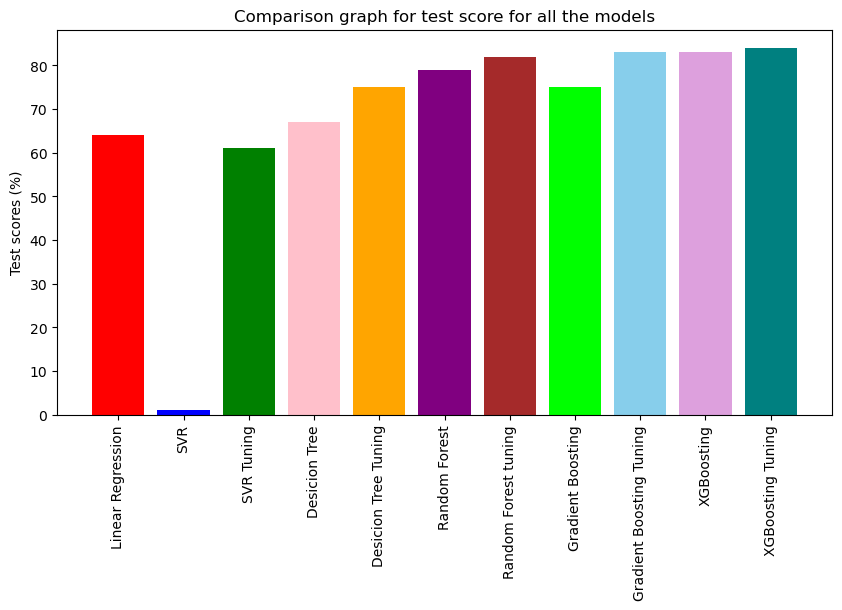

In [270]:
test_score_percentage= result['Test R-squared'] * 100
plt.figure(figsize=(10,5))
plt.title('Comparison graph for test score for all the models')
plt.bar(result['Algorithm'],test_score_percentage,color=['red','blue','green','pink','orange','purple','brown','lime','skyblue','plum','teal'])
plt.ylabel('Test scores (%)')
plt.xticks(rotation=90)
plt.show()

## <b>CONCLUSION

#### <b>Best Overall Model: Tuned XGBoost
- With the highest test R² (0.84) and cross-validation score (0.828), it shows excellent balance between performance and generalization.<br>

#### <b>Top Contenders:<br>
- Tuned Gradient Boosting (Test R²: 0.83)
- Tuned Random Forest (Test R²: 0.82)<br>

#### <b>Models to Avoid:
- Untuned SVR (Very poor fit)
- Untuned Decision Tree (Overfits badly)

#### <b>Tuning Matters:
- Across all models, tuning improves test and CV scores, proving the value of hyperparameter optimization.

## <b>MODEL SAVING

In [271]:
# Model saving using pickle
import pickle
file = open("XGBoost_model.pkl","wb")
pickle.dump(xgb,file)

# <b>END OF PROJECT
<b>SIDDHESHWAR KOLI